In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bank Customer Churn Modelling

The dataset used in this project comes from [here](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling) and will be used to build a classifier that will predict whether a specific customer will exit the bank after 6 months. The project will be split into several parts:
- exploratory data analysis (loading and understanding the dataset, exploring numerical/categorical variables, finding outliers, checking correlations among various numerical attributes, )  
- data preprocessing (preparing the data for the ML algorithms including checking and dealing with missing values (imputing), dealing with outliers, delaing with attributes that may be correlated with each other and also handling and text or categorical attributes)
- feature scaling 
- creating transformation pipeline (for the sake of it) - in case more data arises  
- choosing the right ML algorithms and creating and assessing the ML models  
- fine tuning the models  
- creating a nice presentation  
- done  


# Exploratory Data Analysis

In [2]:
data = pd.read_csv('Datasets/bank_customer_churn_modelling.csv')

In [3]:
target = data['Exited']

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We can see right away that the **RowNumber** column is not necessary. Let's get rid of it.

In [5]:
data.drop(columns=['RowNumber'], inplace=True)

Let's verify that the column has been dropped.

In [6]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Let's look at the column names and the shape of the dataset.

In [7]:
print(data.columns)

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


In [8]:
print(data.shape)

(10000, 13)


So there are 10,000 data rows, 13 columns, one of which is the CustomerID and one is the Exited outcome so in total we will have 11 features that we can use.

The CustomerID is likely not useful so let's drop that as well and use the **info()** method of a pandas DataFrame object to get a description of the data, each feature's type and whether there are missing values. What about the surname feature?

In [9]:
data['Surname'].describe().transpose()

count     10000
unique     2932
top       Smith
freq         32
Name: Surname, dtype: object

There are 2932 unique surnames, many repeated ones, not too surprising given how common some surnames are.The surname won't give us much useful information so we can drop it from the dataset.

In [10]:
data.drop(columns=['CustomerId', 'Surname'], inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Nice, **there are no missing values for any of the features**. It's a very clean dataset (most likely unrealistic to occur in normal situations). We have a mix of **object** and **numerical attributes**. Let's look at them separately using the pandas **select_dtypes()** method.

## Exploring numerical attributes

In [12]:
# list of numerical attributes
data.select_dtypes(exclude=['object']).columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
# let's summarise the numerical data
data.select_dtypes(exclude=['object']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


Let's plot the distributions of all of the numerical attributes.

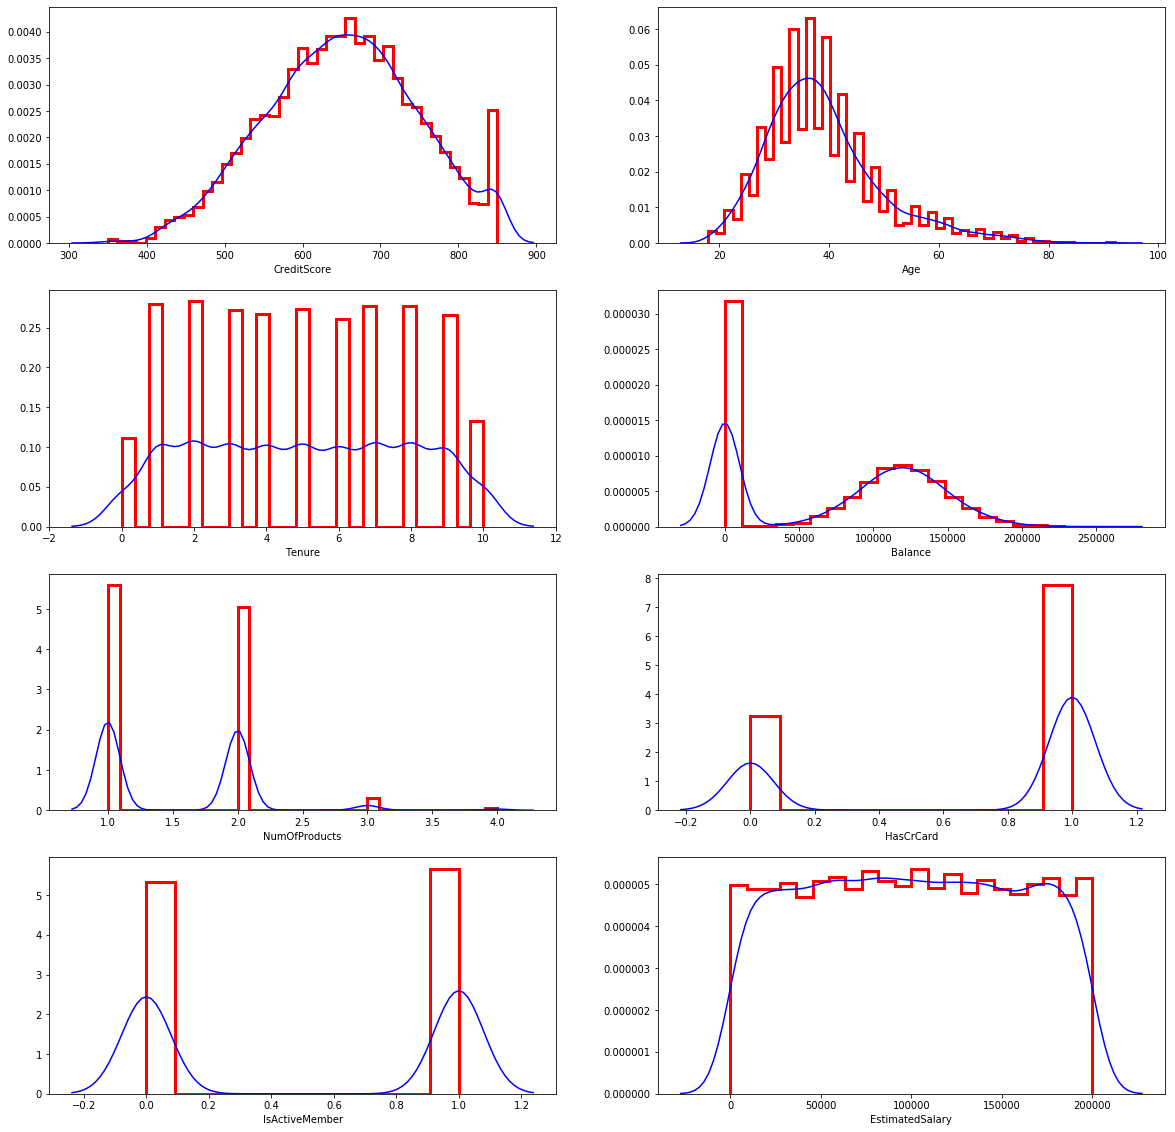

In [14]:
num_attributes = data.select_dtypes(exclude=['object']).drop('Exited', axis=1).copy()

fig = plt.figure(figsize=(20,20))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(4,2,i+1)
    sns.distplot(num_attributes.iloc[:,i],hist=True, rug=False, norm_hist=True,
                 hist_kws={"histtype":"step", "color":"red", "linewidth":3, "alpha":1},
                 kde_kws={"color":"blue"})
    plt.xlabel(num_attributes.columns[i])
plt.show()

Let's look at each of the features (possible in this case because there are so few of them) in more detail. In addition, although some features have numerical values (has credit card, is active member), they are in fact categorical variables (binary ones) and will be treated as such. Let's change their types (as well as the Gender and Geography features) to categorical. Let's also update the list of numerical attributes.

In [15]:
# change the HasCrCard, IsActiveMember, Geography (country) and Gender feature data type to categorical
data['HasCrCard'] = data['HasCrCard'].astype('category')
data['IsActiveMember'] = data['IsActiveMember'].astype('category')
data['Geography'] = data['Geography'].astype('category')
data['Gender'] = data['Gender'].astype('category')

# update the list of numerical (not categorical) attributes
num_attributes = data.select_dtypes(exclude=['object', 'category']).drop('Exited', axis=1).copy()

# create a list containing categorical attributes
cat_attributes = data.select_dtypes(include=['category']).copy()

Let's confirm the data types have changed.

In [16]:
data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited                int64
dtype: object

In [17]:
num_attributes.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'],
      dtype='object')

In [18]:
cat_attributes.columns

Index(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'], dtype='object')

### Credit score distribution

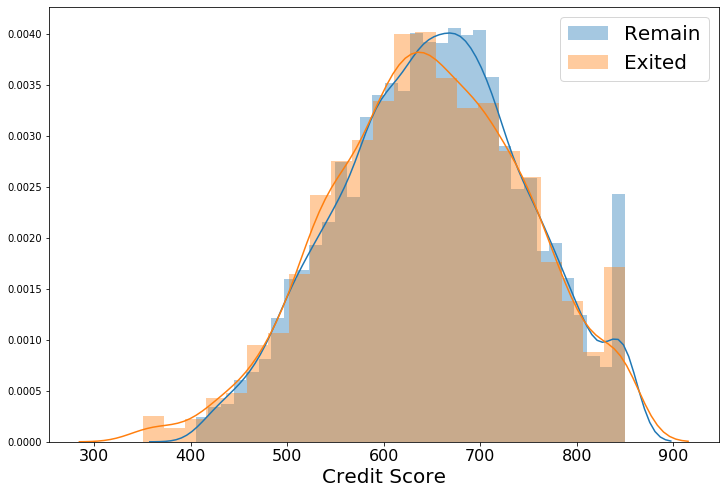

In [19]:
plt.figure(figsize=(12,8))
sns.distplot(data.CreditScore[data.Exited==0], hist=True, kde=True, label='Remain')
sns.distplot(data.CreditScore[data.Exited==1], hist=True, kde=True, label='Exited')
plt.xlabel('Credit Score', size=20)
plt.xticks(size=16)
plt.legend(fontsize=20)

The plot above shows that people will lower credit scores exited more but overall the distribution of the two categories with respect to credit score is similar.


### Age distribution

[Text(0, 0, '18'),
 Text(0, 0, '24'),
 Text(0, 0, '30'),
 Text(0, 0, '36'),
 Text(0, 0, '42'),
 Text(0, 0, '48'),
 Text(0, 0, '54'),
 Text(0, 0, '60'),
 Text(0, 0, '66'),
 Text(0, 0, '72'),
 Text(0, 0, '78'),
 Text(0, 0, '84')]

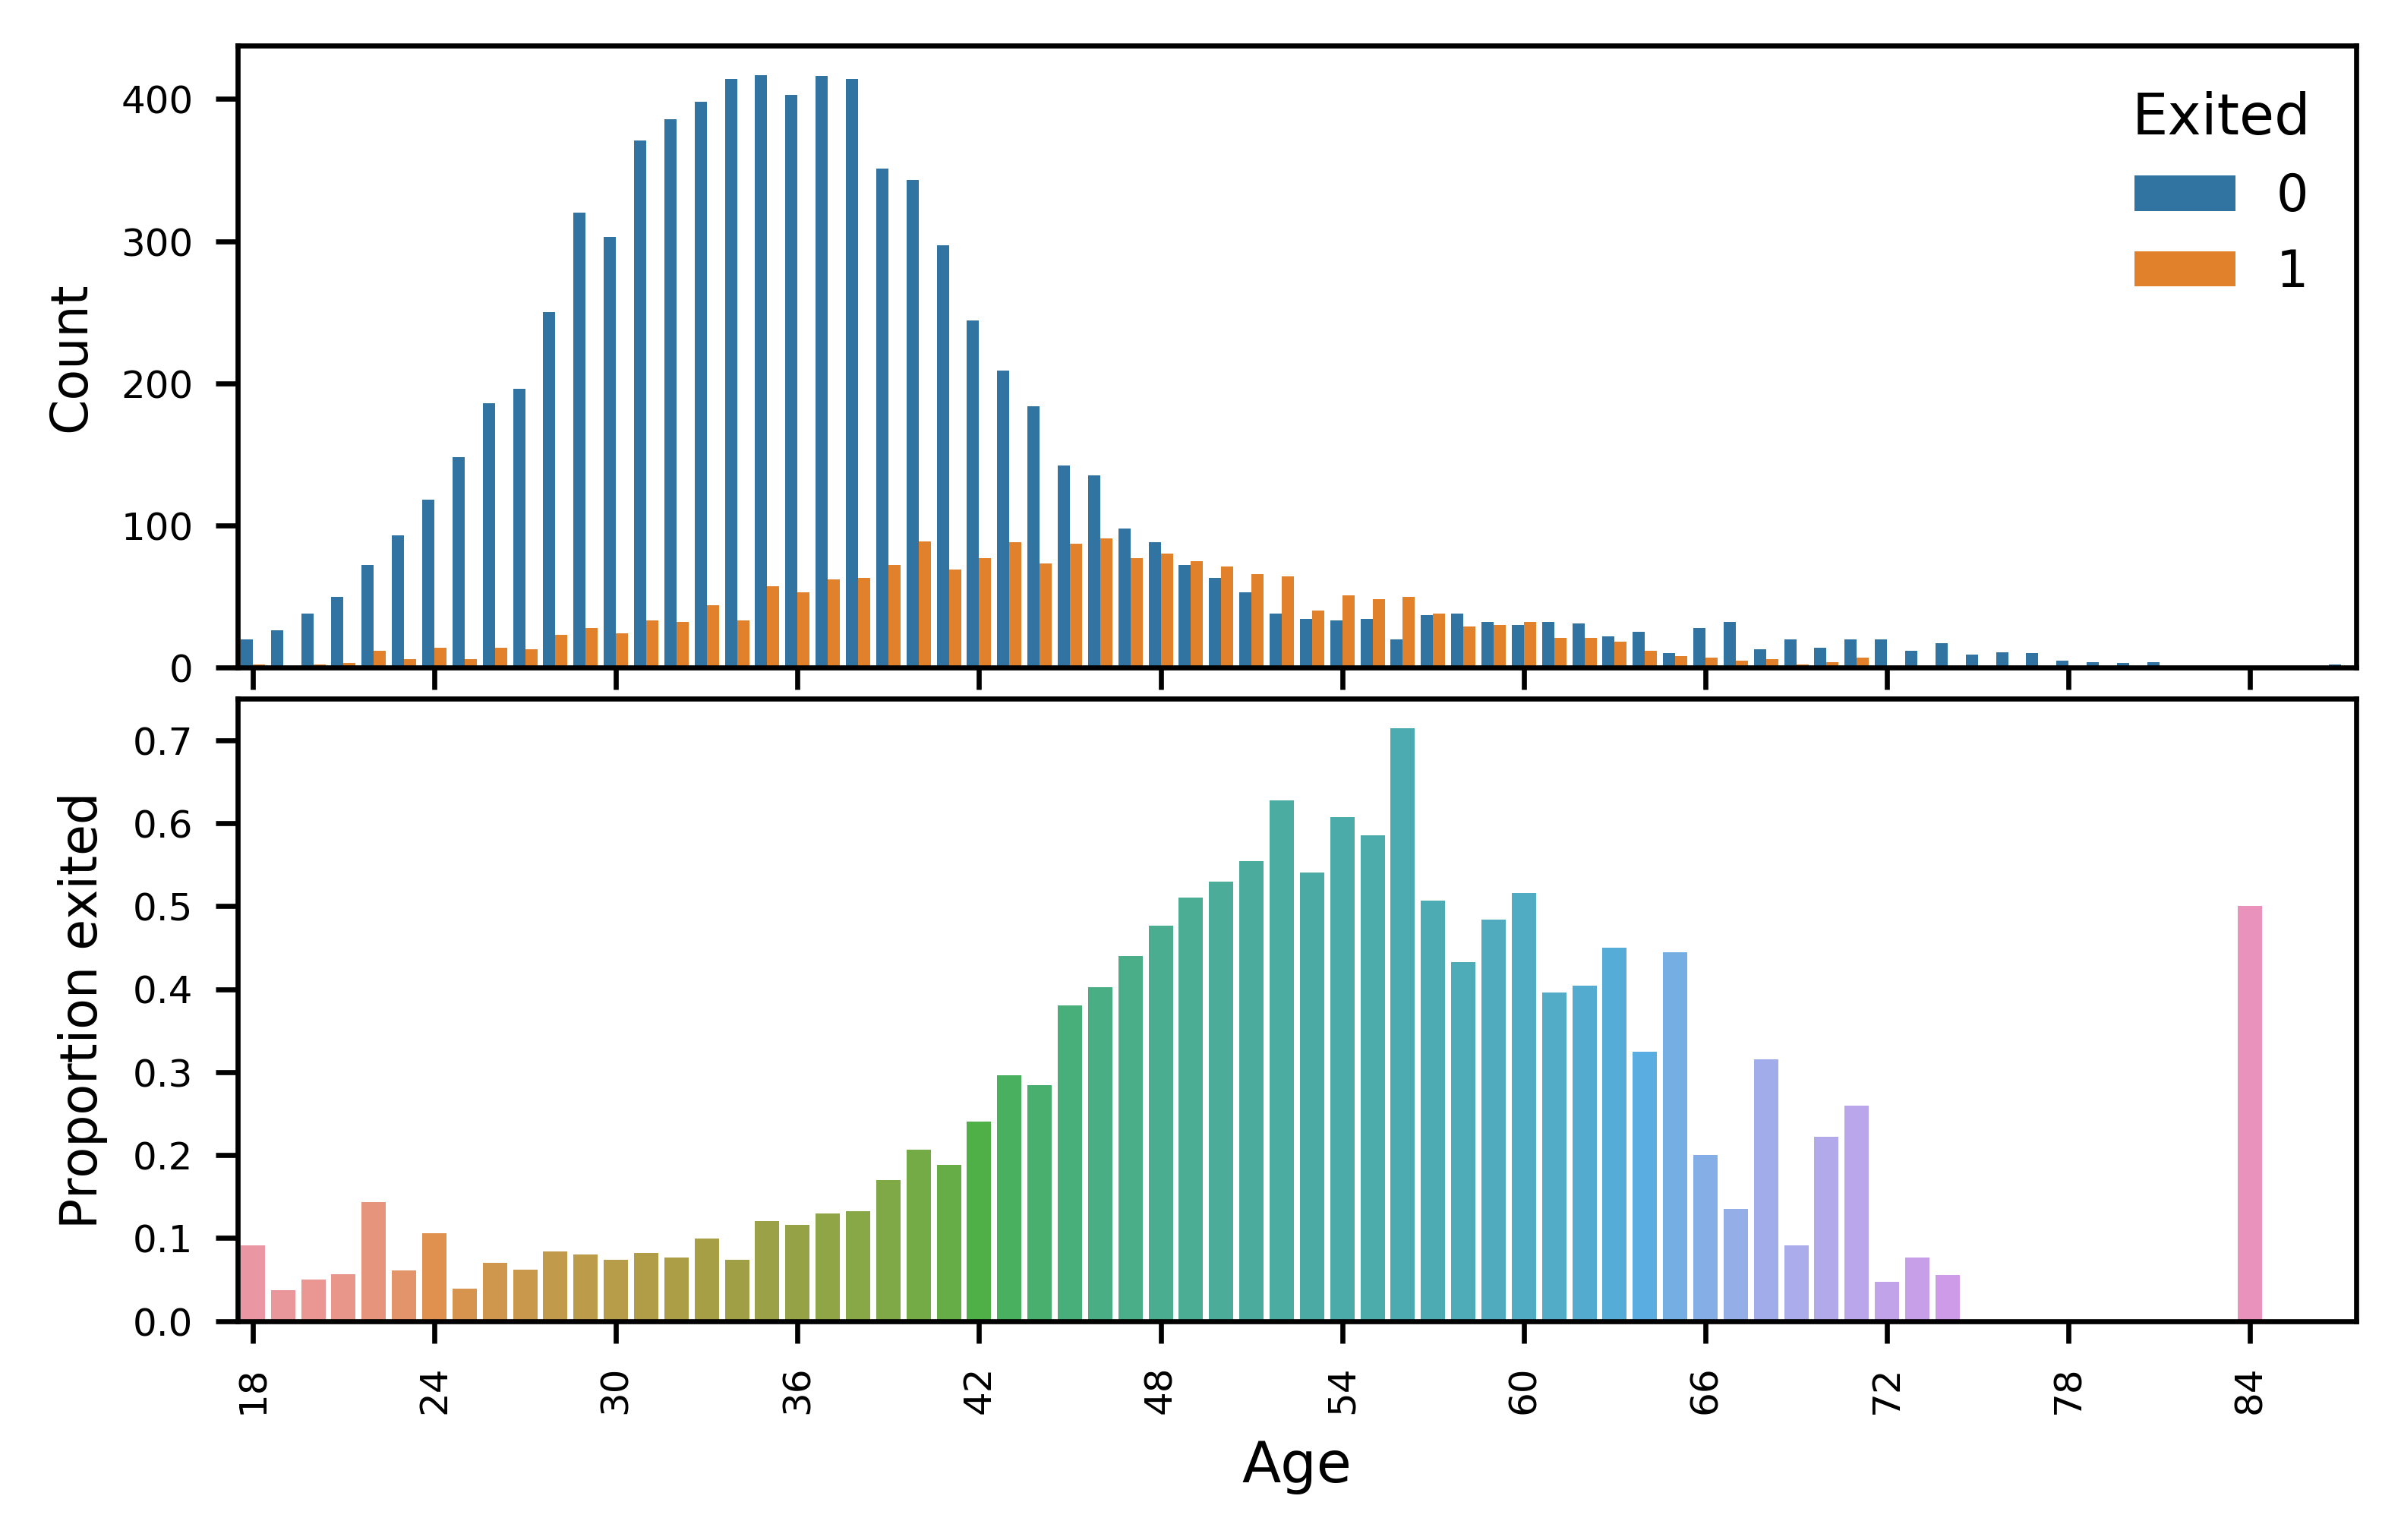

In [20]:
fig, axarr = plt.subplots(nrows=2, ncols=1, sharex=True)
fig.figsize=(20,30)
fig.dpi = 600

sns.countplot(x='Age', hue='Exited', data=data, ax=axarr[0])
axarr[0].tick_params(axis='x', labelsize=6, labelrotation=90)
axarr[0].set_xlabel(None)
axarr[0].tick_params(axis='y', labelsize=6)
axarr[0].set_ylabel('Count', size=8)
axarr[0].legend(loc='upper right', title='Exited', title_fontsize=9, fontsize=8, frameon=False)

fig.subplots_adjust(hspace=0.05, bottom=0.15, top=0.85)

sns.barplot(data.Age, data.Exited, ci=None, ax=axarr[1])
axarr[1].tick_params(axis='x', labelsize=6, labelrotation=90)
axarr[1].set_xlabel('Age', size=9)
axarr[1].tick_params(axis='y', labelsize=6)
axarr[1].set_ylabel('Proportion exited', size=8)
axarr[1].set_xticks(axarr[1].get_xticks()[::6])
axarr[1].set_xticklabels(np.arange(18,90,6))





It's interesting to see from the top graph that although the age of the customers is relatively spread out, there is a group of elderlies (>60) that are still part of the bank. The bottom graph shows the distribution of exits for each age group. It's interesting to see that most of the younger customers have not exited, and similarly the older customers have also not exited (in terms of proportion). Most of the exits occurred in middle-aged customers where the proportion is the highest (42-66).  

### Tenure distribution

Tenure refers to the number of years that a specific client has been with the bank. One would assume that an older (years with the bank) client would be more likely to stay. Let's see if that's true.

Text(0, 0.5, 'Proportion exited')

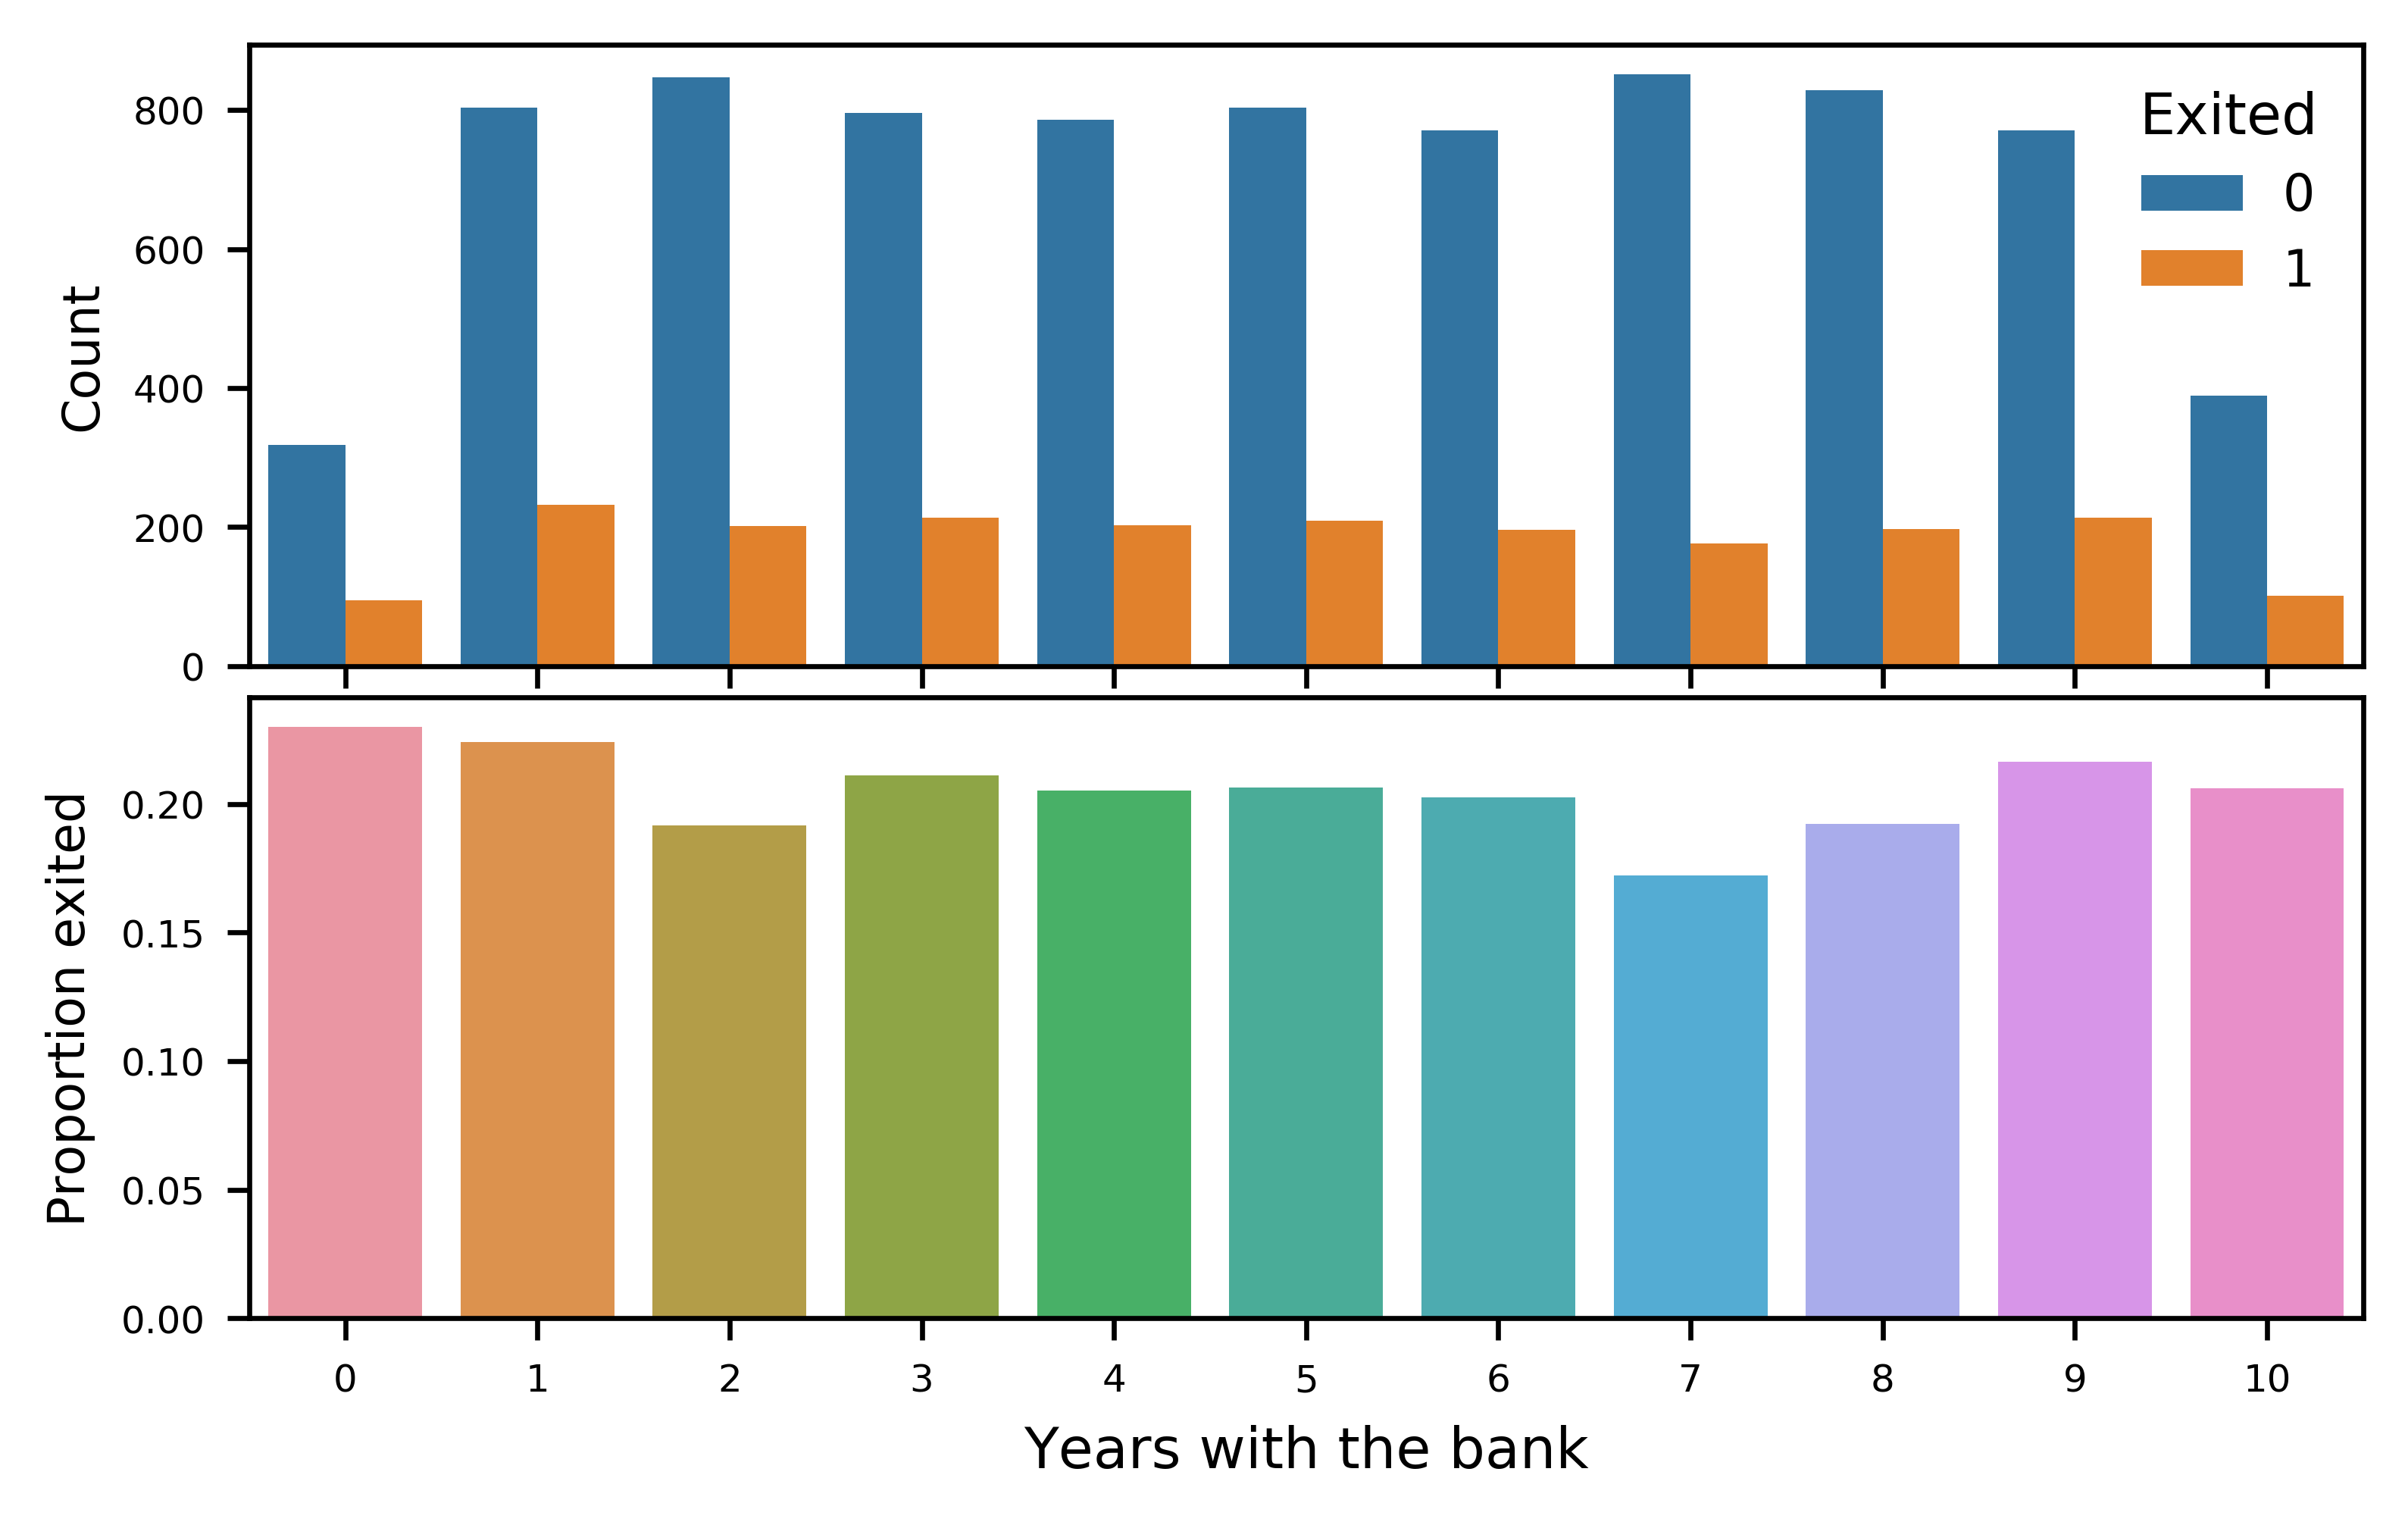

In [21]:
fig, axarr = plt.subplots(nrows=2, ncols=1, sharex=True)
fig.figsize=(20,30)
fig.dpi = 600

sns.countplot(x='Tenure', hue='Exited', data=data, ax=axarr[0])
axarr[0].set_xlabel(None)
axarr[0].tick_params(axis='y', labelsize=6)
axarr[0].set_ylabel('Count', size=8)
axarr[0].legend(loc='upper right', title='Exited', title_fontsize=9, fontsize=8, frameon=False)

fig.subplots_adjust(hspace=0.05, bottom=0.15, top=0.85)

sns.barplot(data.Tenure, data.Exited, ci=None, ax=axarr[1])
axarr[1].tick_params(axis='x', labelsize=6)
axarr[1].set_xlabel('Years with the bank', size=9)
axarr[1].tick_params(axis='y', labelsize=6)
axarr[1].set_ylabel('Proportion exited', size=8)






From the top graph we can see that number of people that exited (absolute count) is in fact the lowest with the newest customers. That does, however, make sense. Depending on when the data was collected, we wouldn't necessarily capture their possible exits. The graph below shows the distribution of proportion of exits for each tenure year. The percentages of the people that exited is quite similar regardless of the tenure duration.



### Balance distribution

Now let's look at how the balance is distributed over the customers. It is possible that people with a higher balance in their accounts are less likely to churn compared to the ones with no or little money in the accounts.

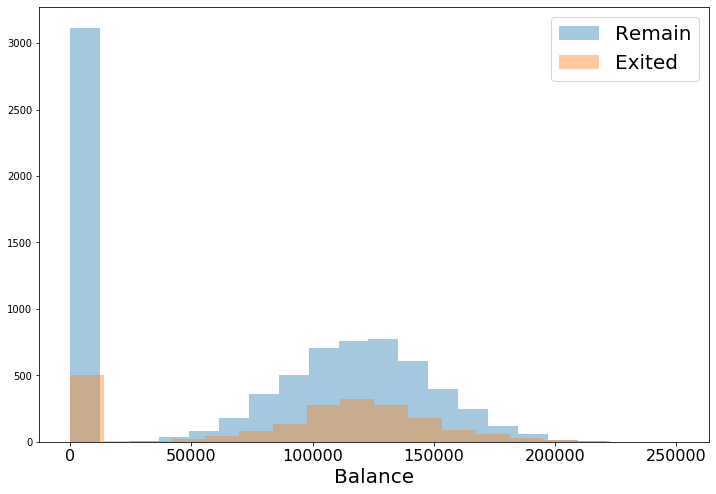

In [22]:
plt.figure(figsize=(12,8))
sns.distplot(data.Balance[data.Exited==0], kde=False,hist=True, label='Remain')
sns.distplot(data.Balance[data.Exited==1], kde=False,hist=True, label='Exited')
plt.xlabel('Balance', size=20)
plt.xticks(size=16)
plt.legend(fontsize=20)

Interestingly enough, there are customers with quite high balances that have left. Furthermore, there are a lot of customers with 0 balance that remained. The latter could be (has to be checked) explained if the accounts were new (i.e. tenure low).

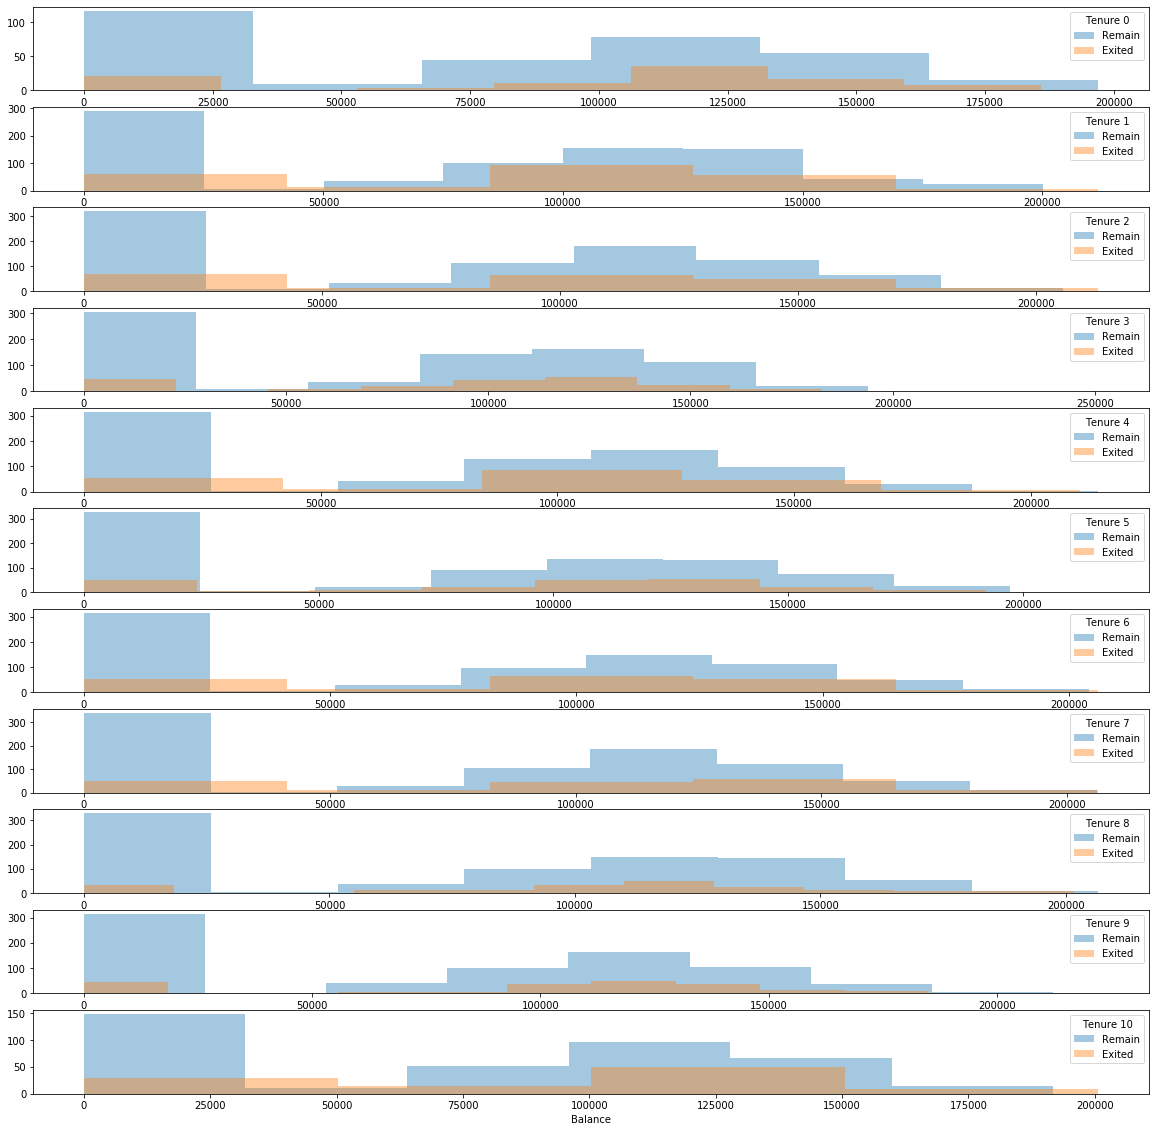

In [23]:
fig = plt.figure(figsize=(20,20))

for i in range(11):
    fig.add_subplot(11,1,i+1)
    sns.distplot(data.query('Tenure==@i & Exited==0').Balance, hist=True,kde=False,
                 label='Remain')
    sns.distplot(data.query('Tenure==@i & Exited==1').Balance, hist=True,kde=False, label='Exited')
    plt.legend(title=f'Tenure {i}')
    
plt.show()

Looking at all the tenures, there's a relatively similar distribution for the balances for all of them.

### Number of products distribution

One would assume that a customer with more products from the bank is less likely to have exited. Let's see if the hypothesis is true.

Text(0, 0.5, 'Proportion exited')

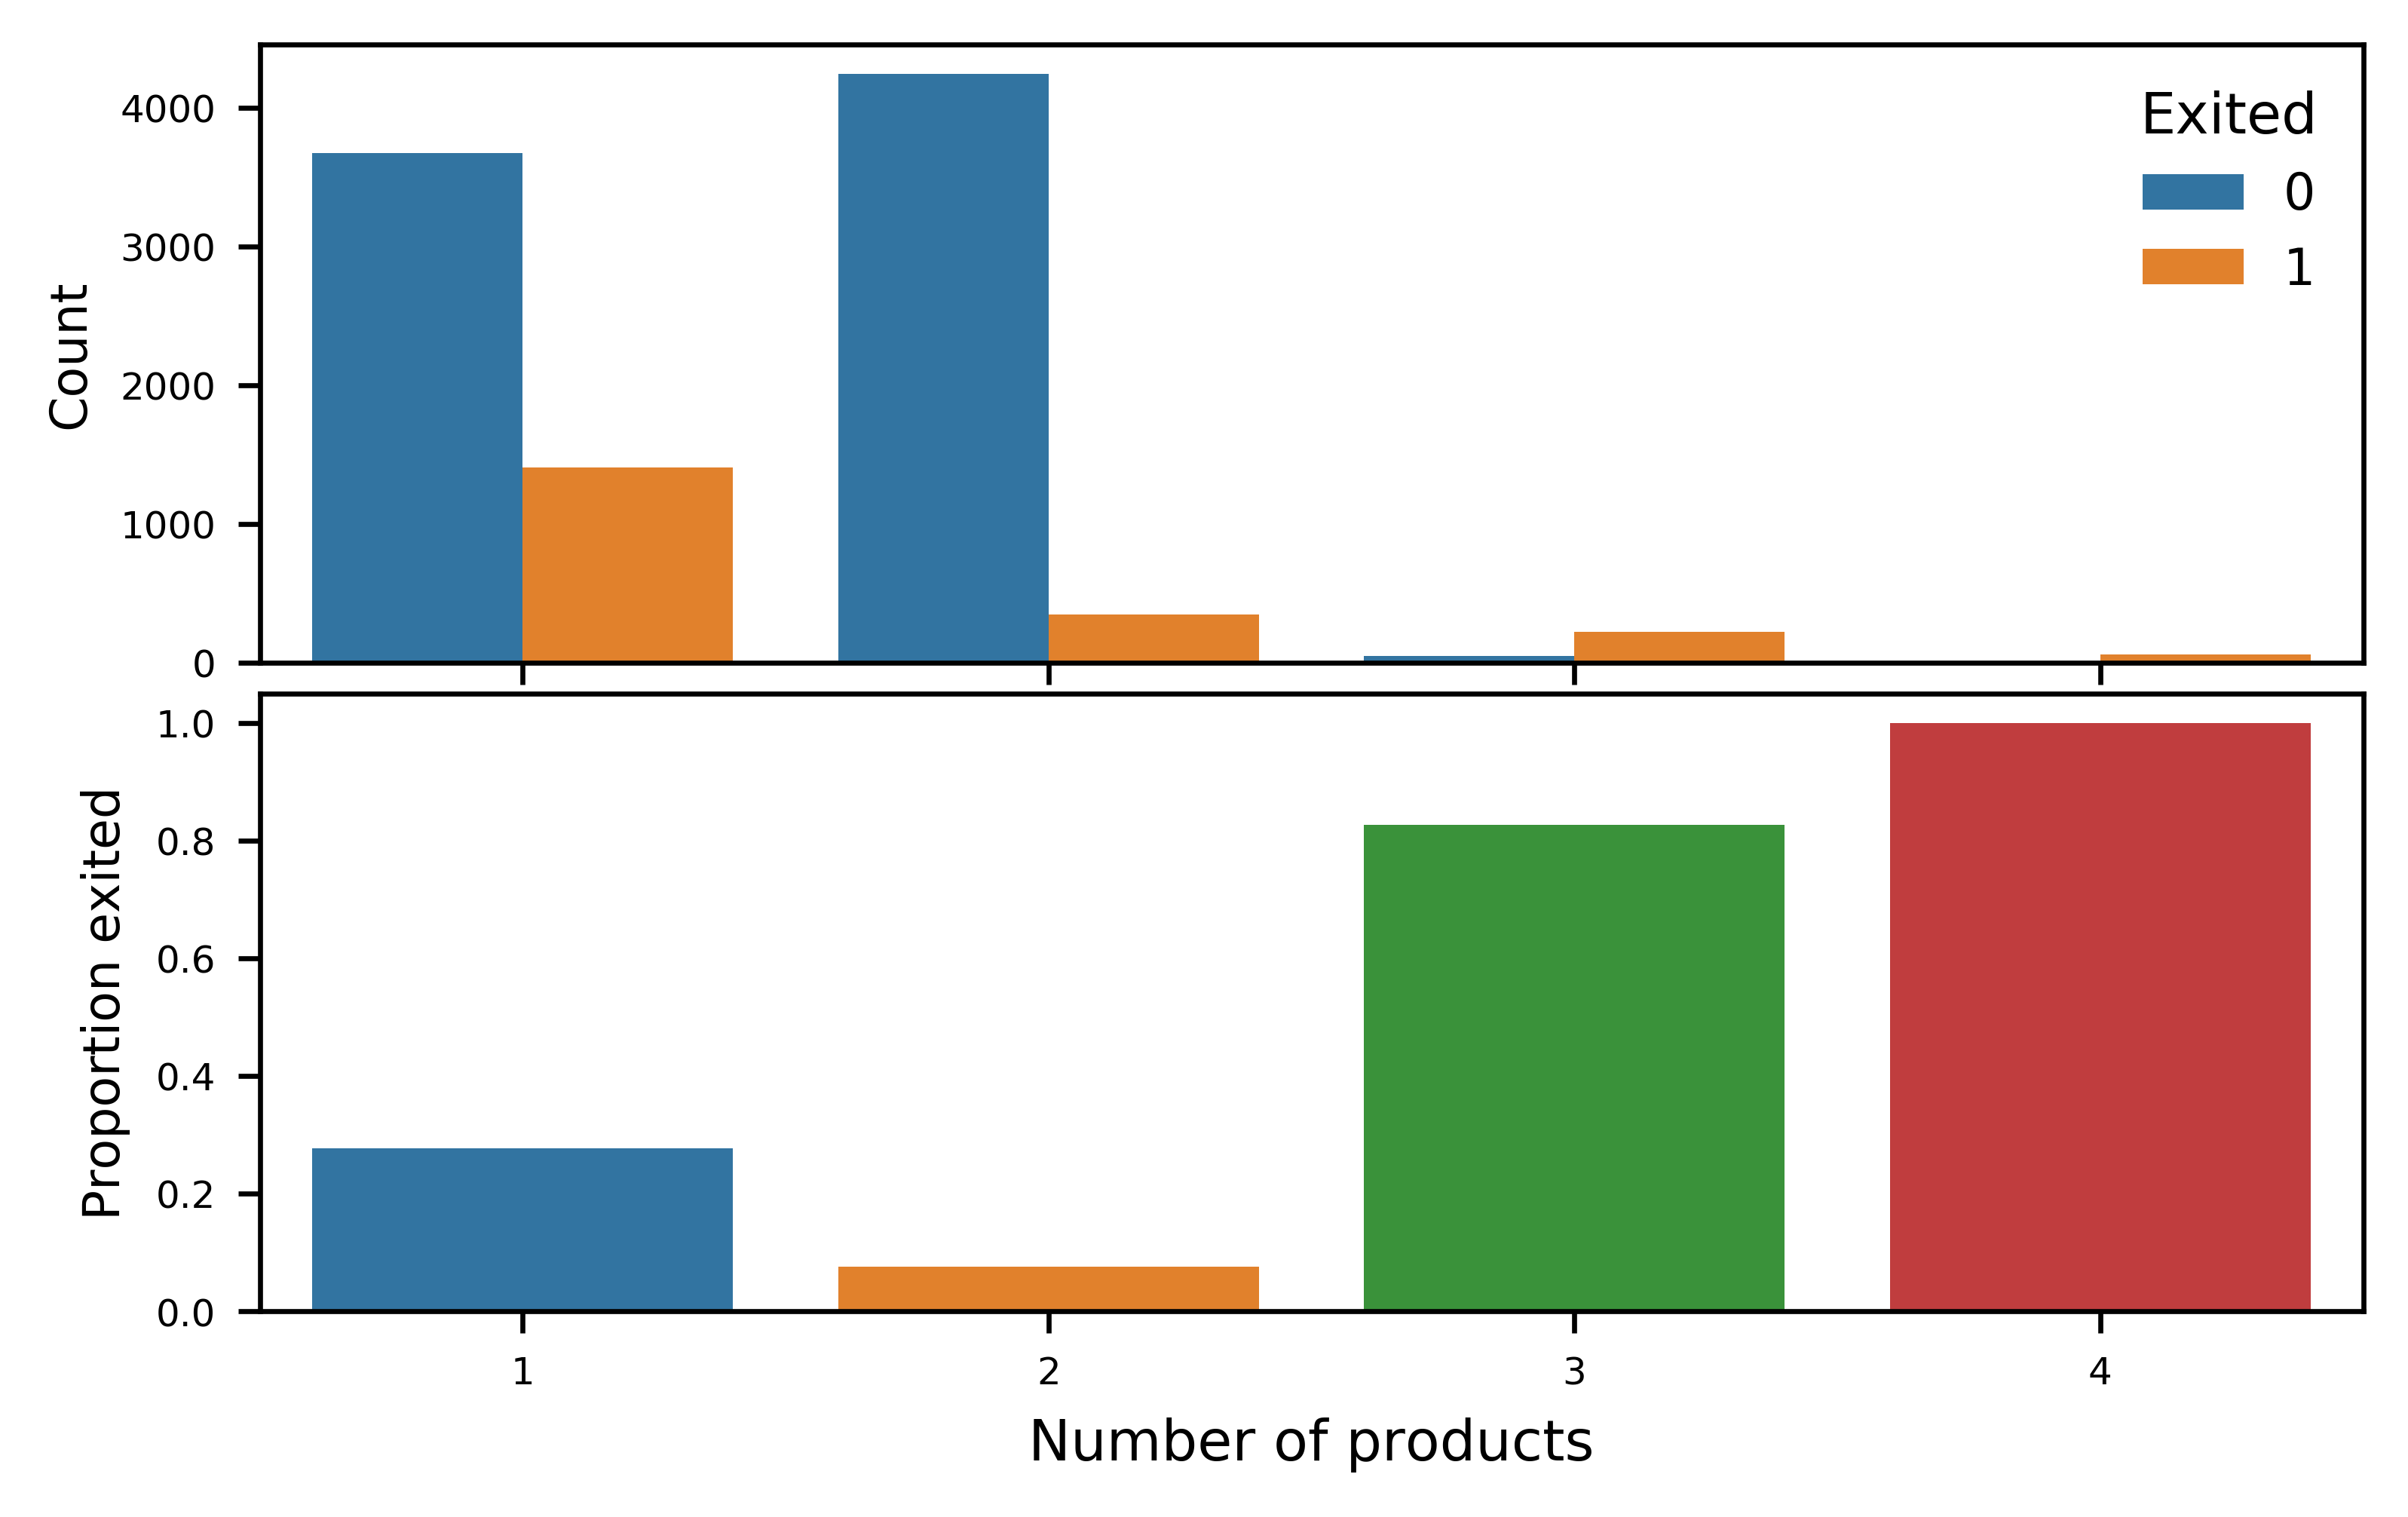

In [24]:
fig, axarr = plt.subplots(nrows=2, ncols=1, sharex=True)
fig.figsize=(20,30)
fig.dpi = 600

sns.countplot(x='NumOfProducts', hue='Exited', data=data, ax=axarr[0])
axarr[0].set_xlabel(None)
axarr[0].tick_params(axis='y', labelsize=6)
axarr[0].set_ylabel('Count', size=8)
axarr[0].legend(loc='upper right', title='Exited', title_fontsize=9, fontsize=8, frameon=False)

fig.subplots_adjust(hspace=0.05, bottom=0.15, top=0.85)

sns.barplot(data.NumOfProducts, data.Exited, ci=None, ax=axarr[1])
axarr[1].tick_params(axis='x', labelsize=6)
axarr[1].set_xlabel('Number of products', size=9)
axarr[1].tick_params(axis='y', labelsize=6)
axarr[1].set_ylabel('Proportion exited', size=8)

Interesting. The highest proportion of people that exited are the ones with 4 products and the lowest with 2 products. Of course also the highest number of customers have 2 products and very few have 3 or 4 thus explaining the large proportions.

### Exploring estimated salary

Text(0, 0.5, 'Proportion exited')

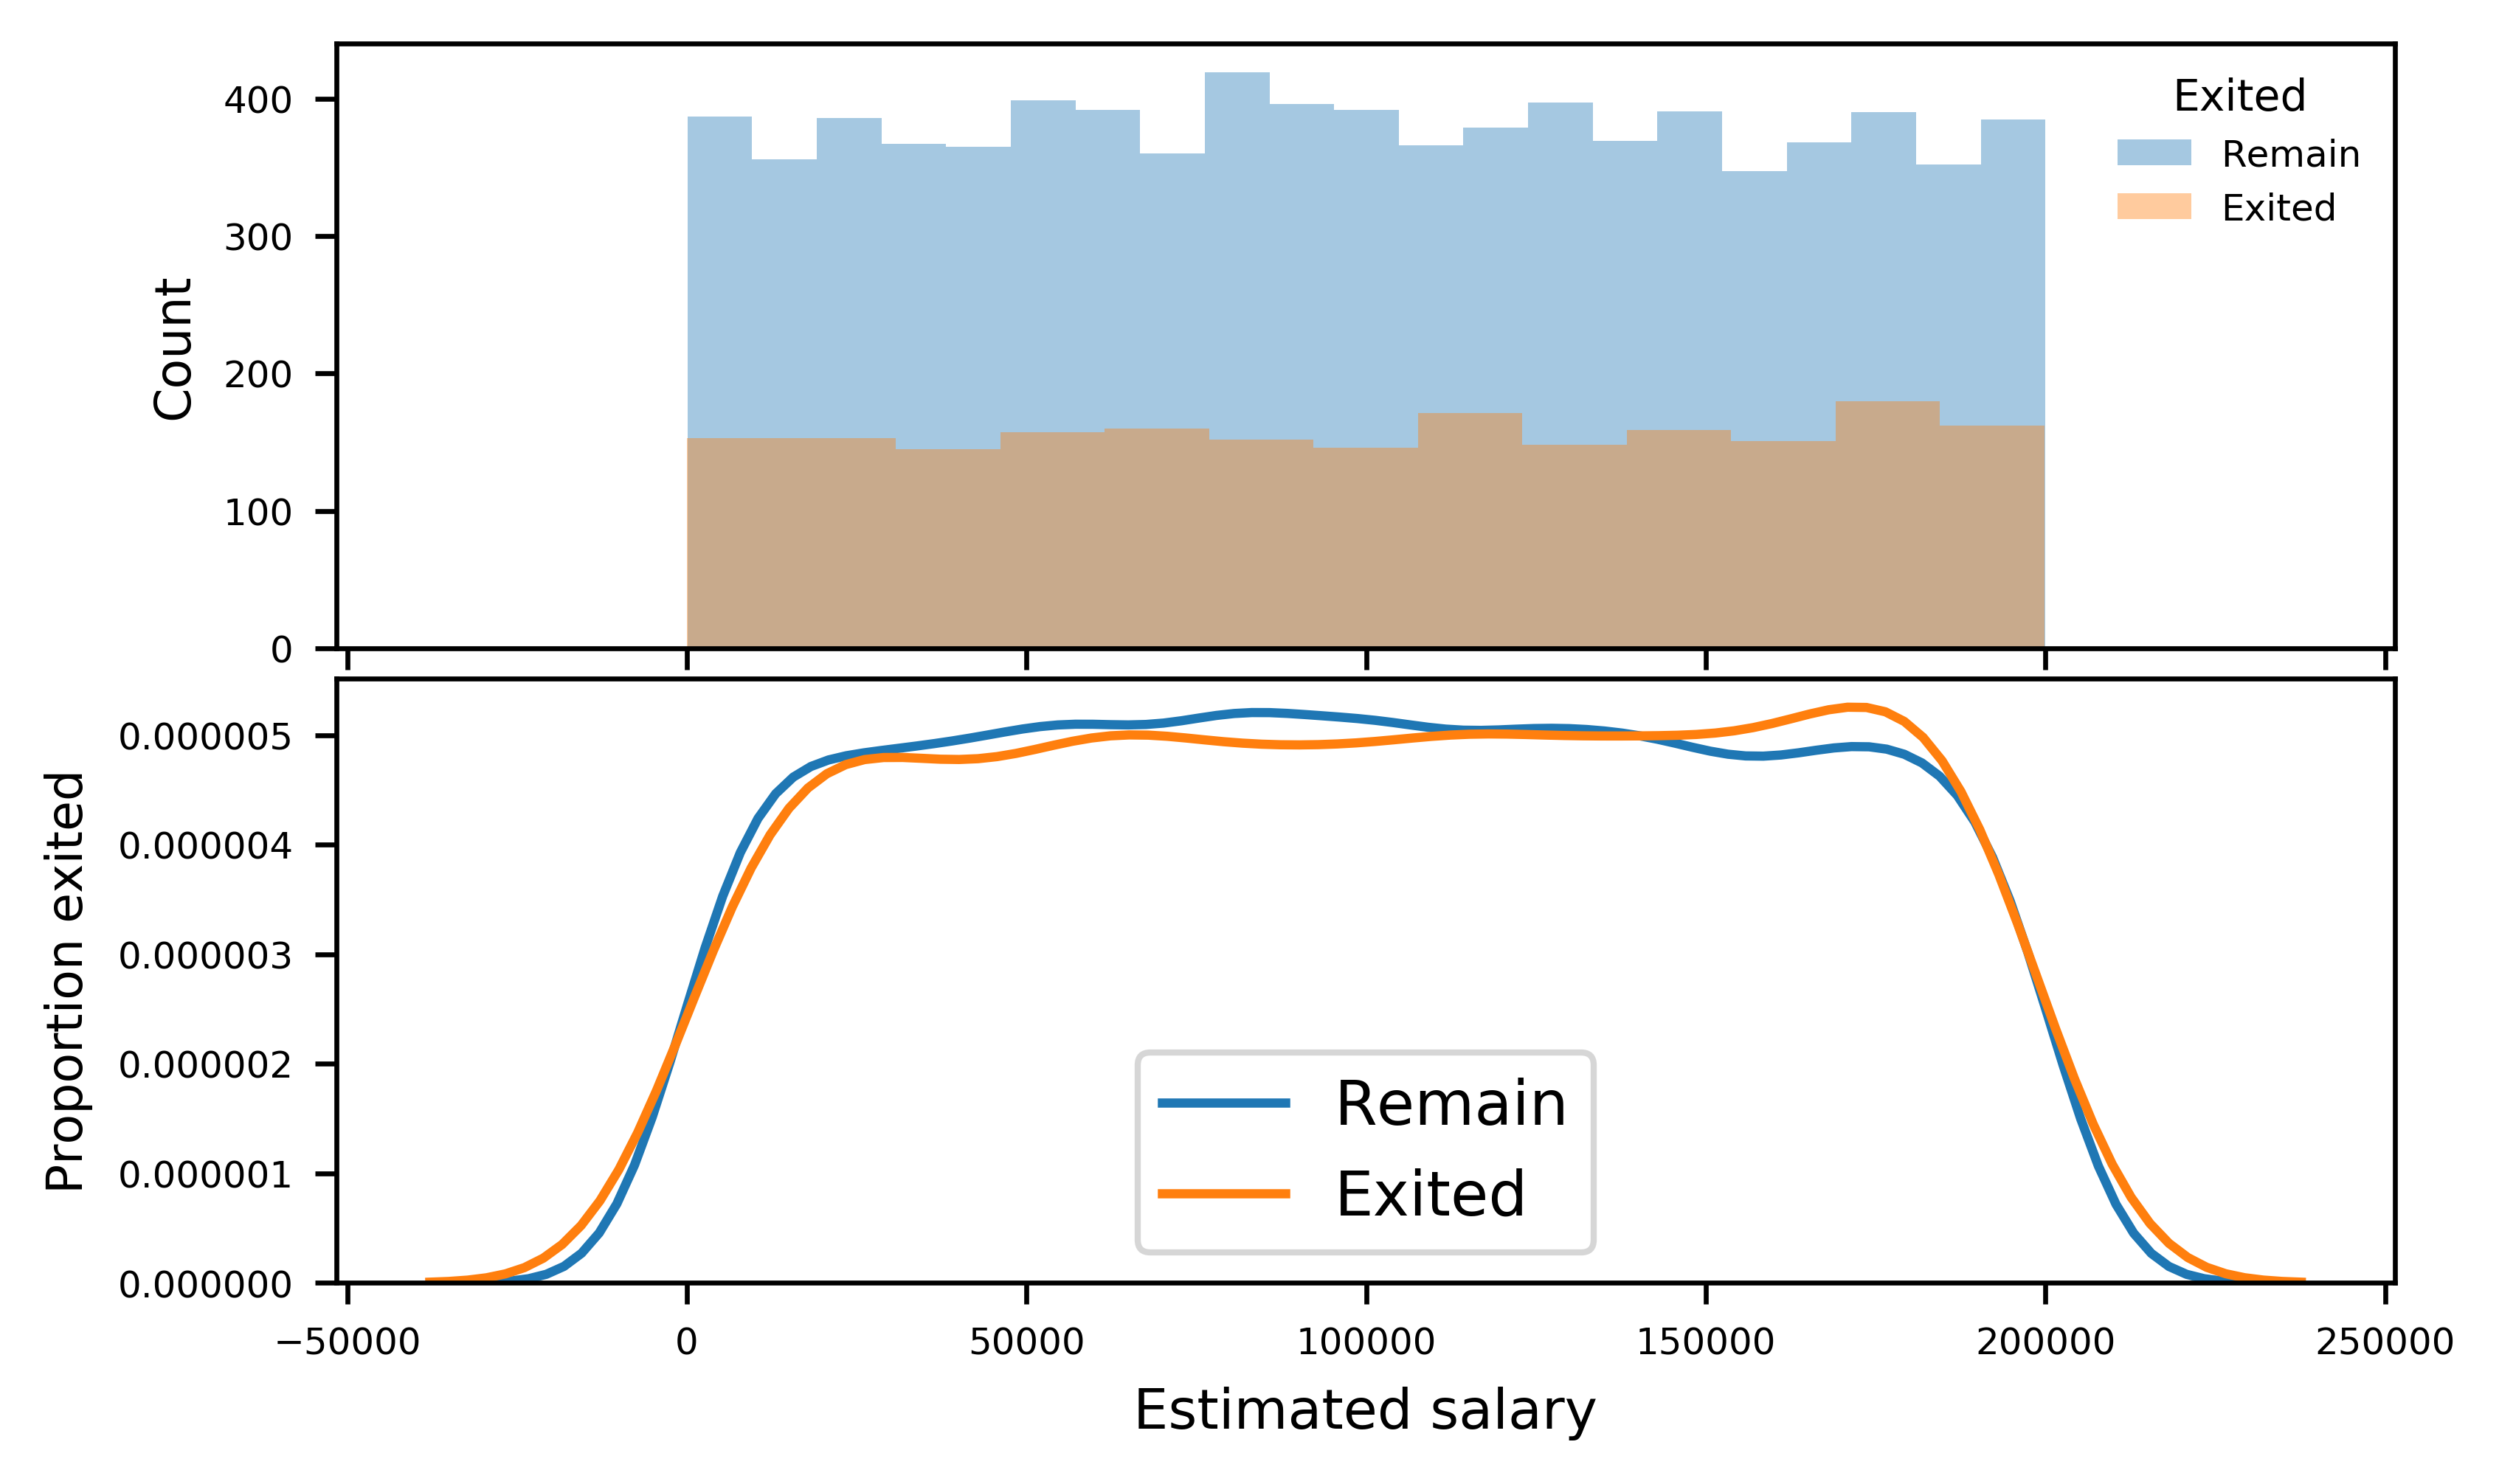

In [25]:
fig, axarr = plt.subplots(nrows=2, ncols=1, sharex=True)
fig.figsize=(20,30)
fig.dpi = 600


sns.distplot(data.EstimatedSalary[data.Exited==0], kde=False,hist=True, label='Remain', ax=axarr[0])
sns.distplot(data.EstimatedSalary[data.Exited==1], kde=False,hist=True, label='Exited', ax=axarr[0])
axarr[0].set_xlabel(None)
axarr[0].tick_params(axis='y', labelsize=6)
axarr[0].set_ylabel('Count', size=8)
axarr[0].legend(loc='upper right', title='Exited', title_fontsize=7, fontsize=6, frameon=False)

fig.subplots_adjust(hspace=0.05, bottom=0.15, top=0.85)

sns.distplot(data.EstimatedSalary[data.Exited==0], hist=False, kde=True, label='Remain', ax=axarr[1])
sns.distplot(data.EstimatedSalary[data.Exited==1], hist=False, kde=True, label='Exited', ax=axarr[1])
axarr[1].tick_params(axis='x', labelsize=6)
axarr[1].set_xlabel('Estimated salary', size=9)
axarr[1].tick_params(axis='y', labelsize=6)
axarr[1].set_ylabel('Proportion exited', size=8)






There are customers with all estimated salaries and the proportion of customers who have exited is relatively similar (the distributions are not separable).

## Checking for outliers

Let's also look at whether there are outliers in the data.

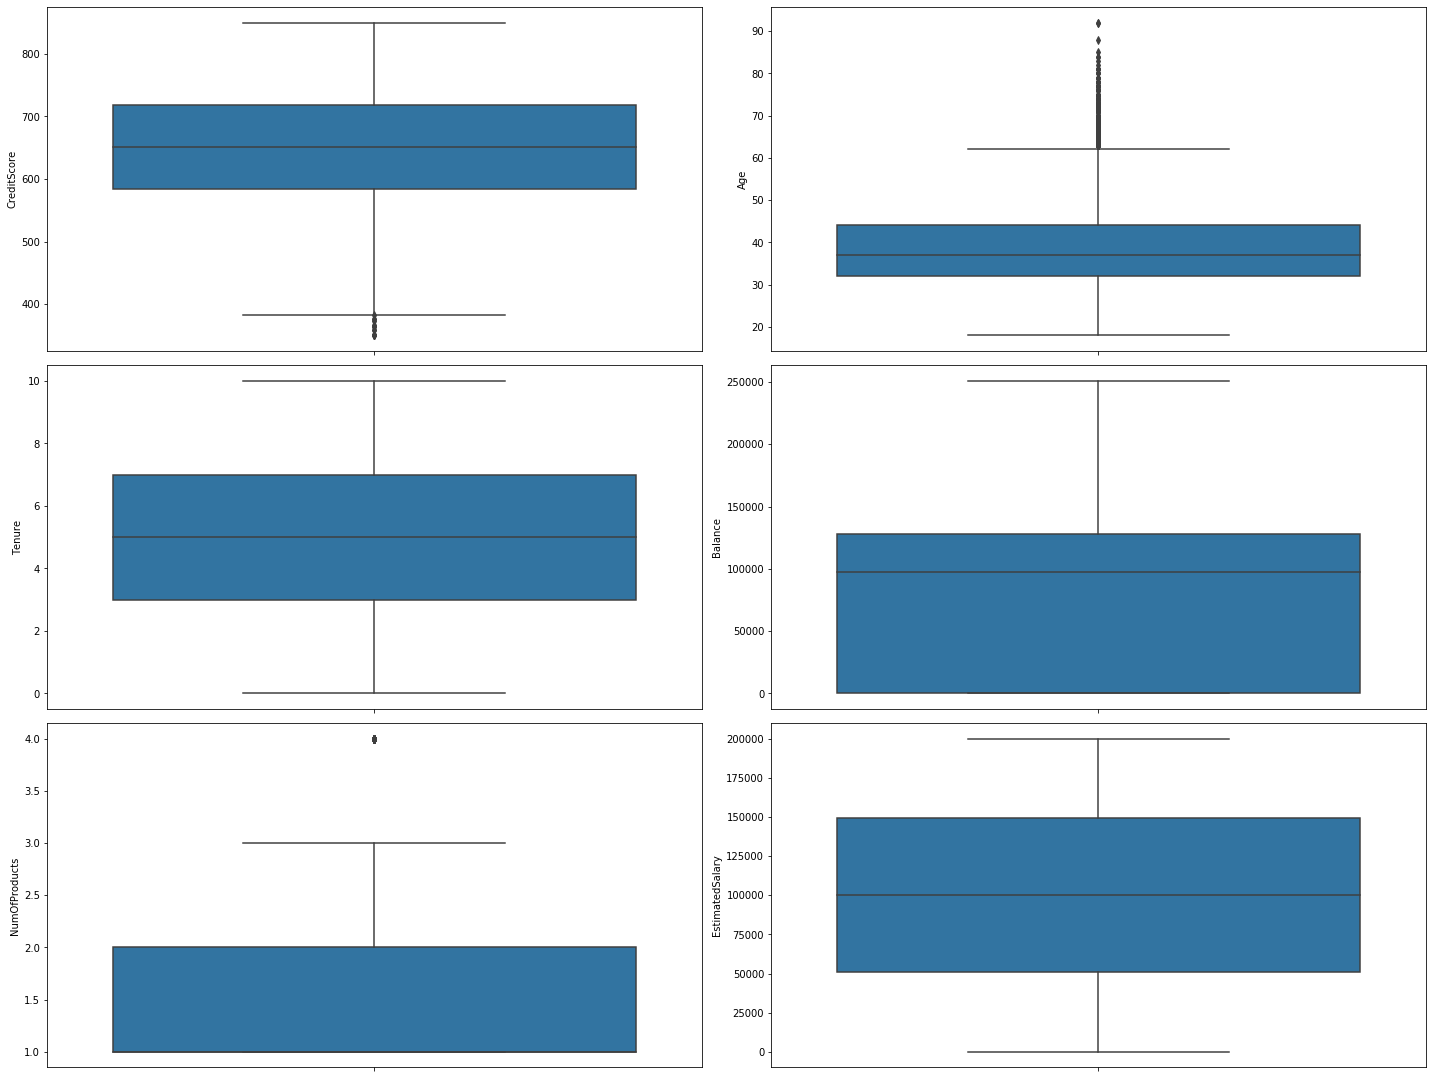

In [26]:
fig = plt.figure(figsize=(20,20))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(4,2,i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

There are some outliers in the CreditScore, Age, Num of products (barely) attributes.

## Checking for correlations

Let's look at the correlation between pairs of attributes. It's worth seeing if any of them are correlated and by how much as we can remove highly correlated features.

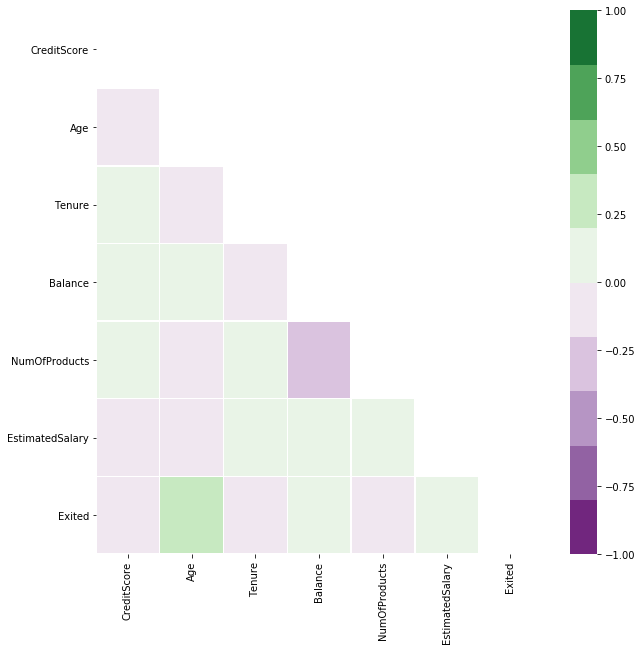

In [27]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr, mask=mask,ax=ax, vmin=-1.0, vmax=1.0,cmap=sns.color_palette("PRGn", 10), linewidths=0.5)

From the heatmap we can see that there isn't much correlation between the various features. Let's look at the correlation with the target variable:

In [28]:
corr['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Name: Exited, dtype: float64

Age and balance are slightly correlated with Exited and some are very slightly negatively correlated. Overall, however, the correlation values (whether positive or negative) are low.

Let's also look at the values for correlations among attributes between themselves, not just with the target variable. (A correlation of 1.0 will mean it's with itself so we can drop them)

In [29]:
threshold = 0.05
important_corrs = (corr[abs(corr>threshold)][corr != 1.0].unstack().dropna().to_dict())

unique_important_corrs = pd.DataFrame(
                        list(set([(tuple(sorted(key)), important_corrs[key]) \
                                  for key in important_corrs])), columns=['attribute pair', 'correlation'])

In [30]:
unique_important_corrs

,attribute pair,correlation
0,"(Balance, Exited)",0.118533
1,"(Age, Exited)",0.285323


As expected (given the colours of the heatmap), the only "significant" (and even then the value is very small) correlations are between the **Balance** and **Age** features and the target **Exited** variable.

## Exploring categorical attributes

In [31]:
# list of categorical attributes and 
data.select_dtypes(include=['category']).columns


Index(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'], dtype='object')

In [32]:
# summary of the categorical features
data.select_dtypes(include=['category']).describe().transpose()

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
HasCrCard,10000,2,1,7055
IsActiveMember,10000,2,1,5151


There are 4 categorical features that we need to consider: geography, gender, possession of credit card and member activity. We can see that there are 3 countries, 2 genders, and two "types" for the credit card possession and customer activity (binary variables (no (0), yes (1))).

### Exploring gender

Text(0.5, 0, 'Proportion exited')

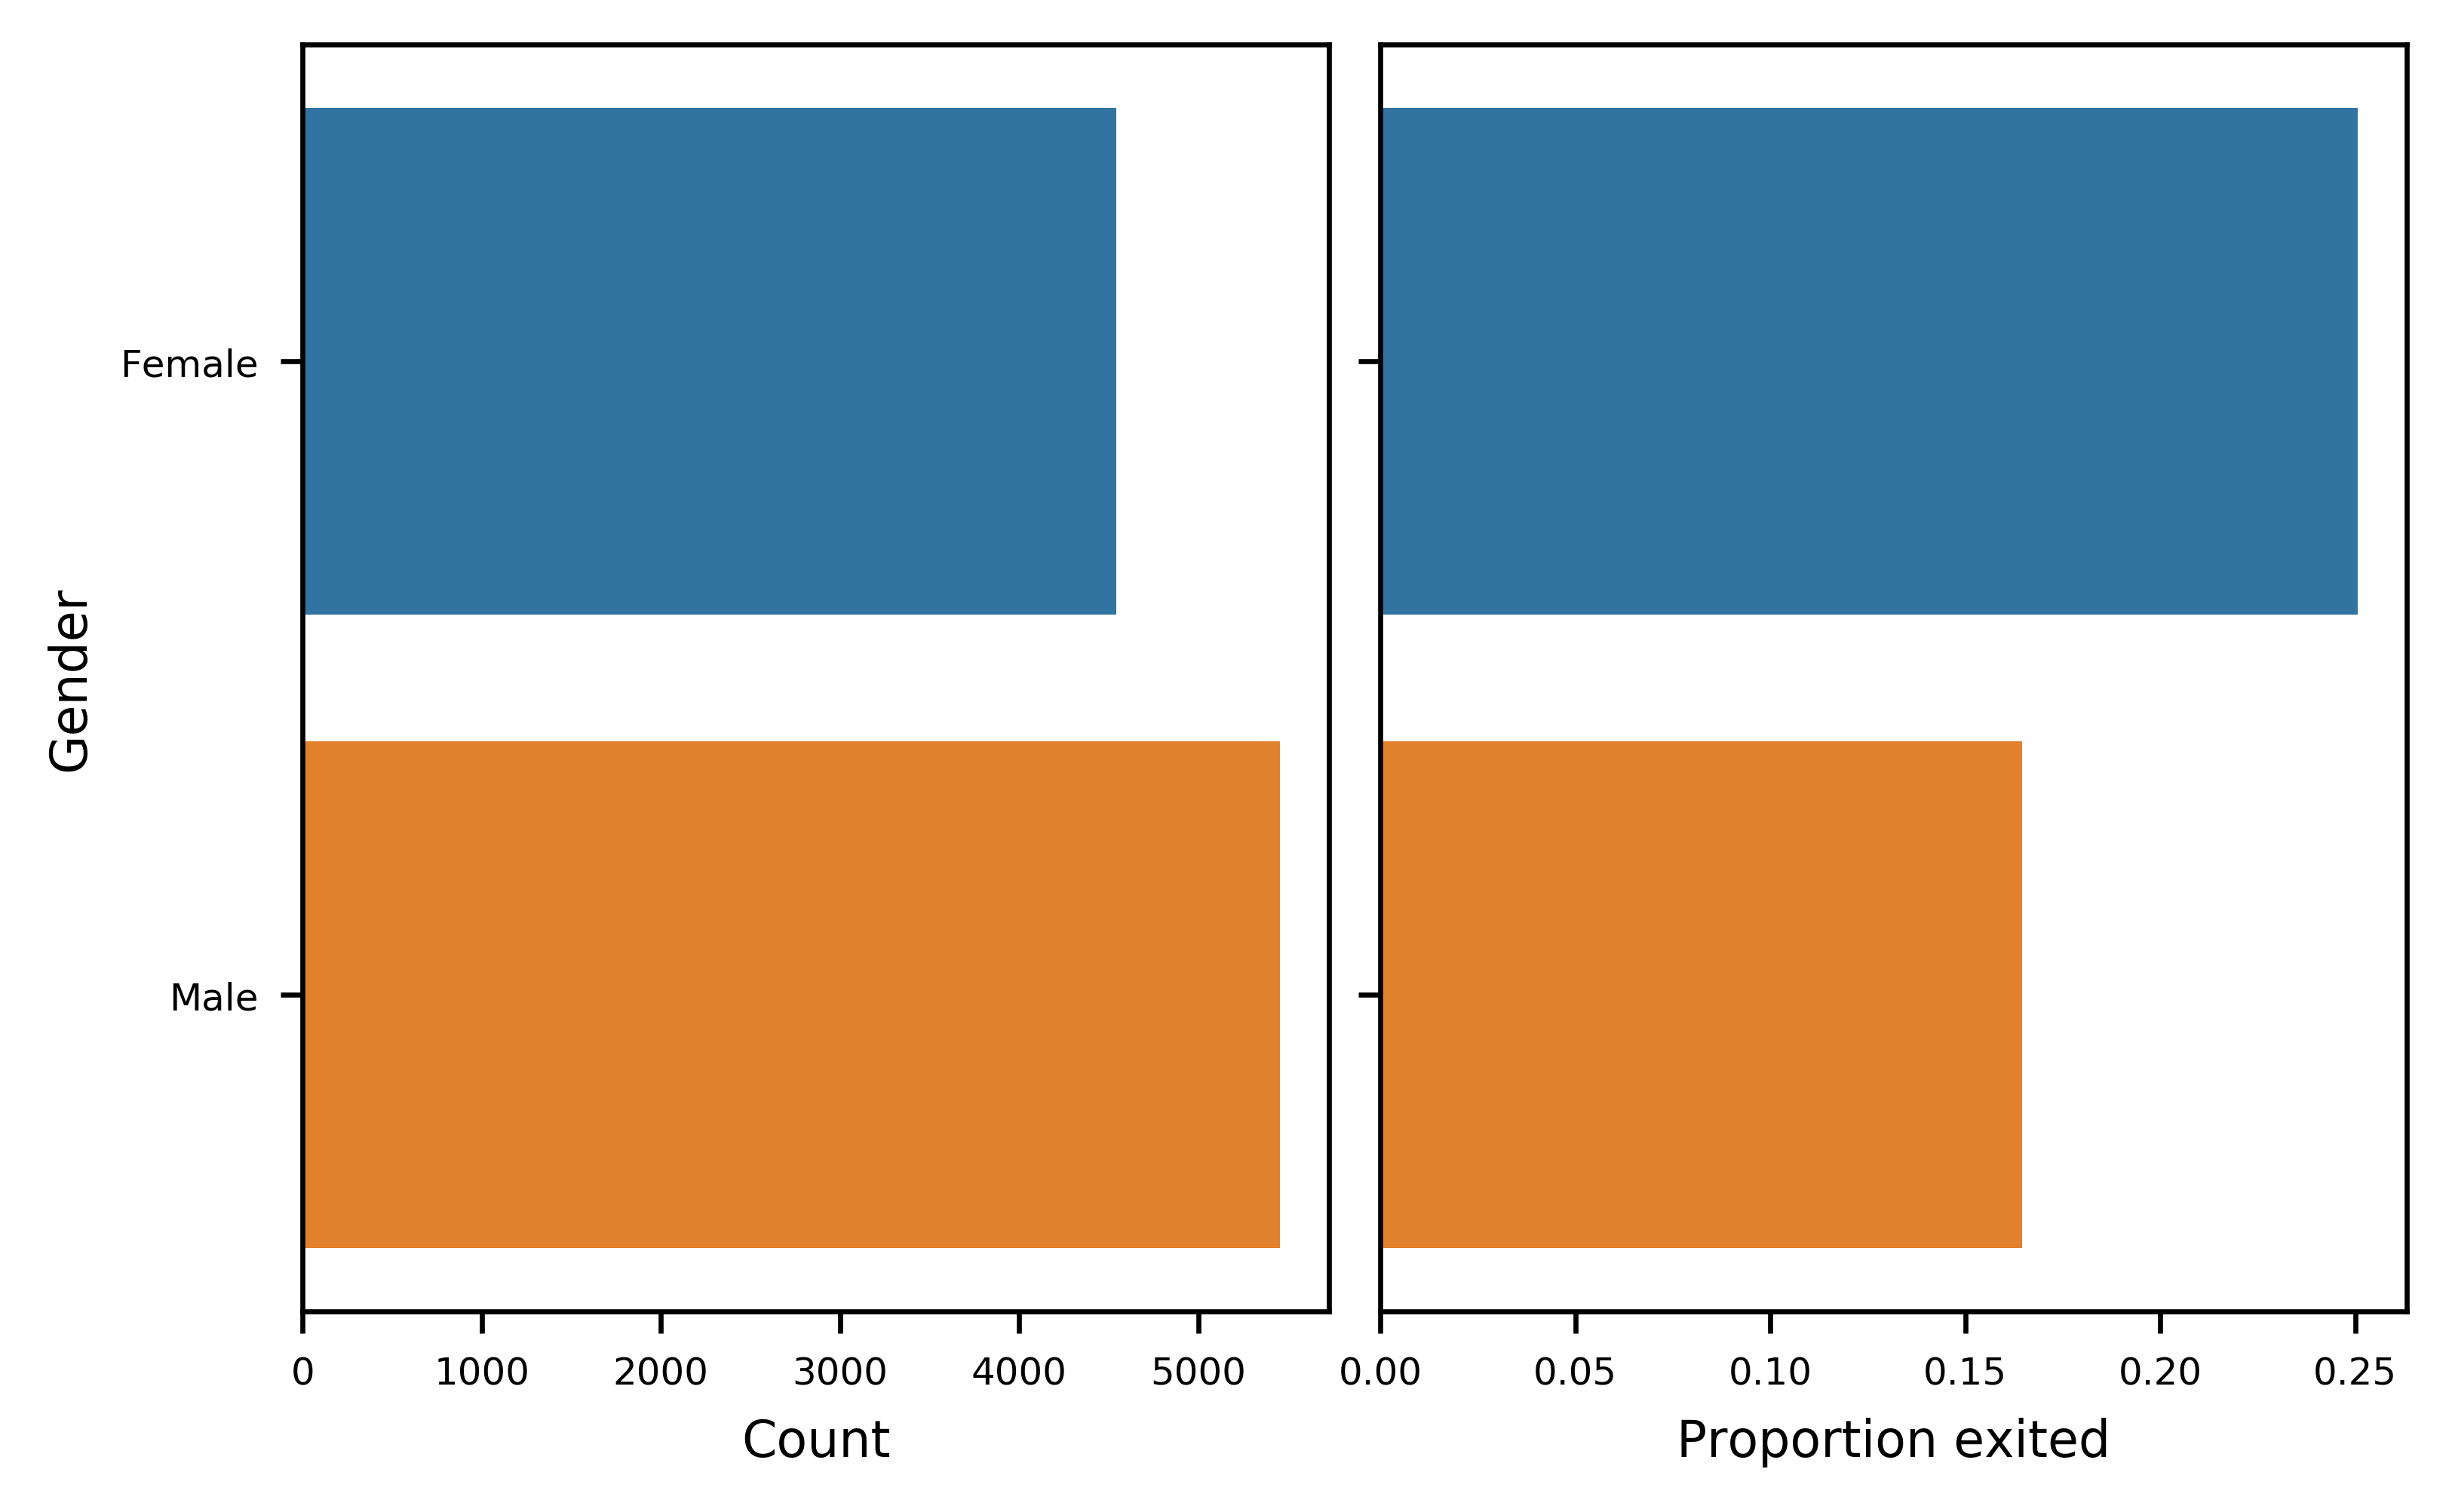

In [33]:
fig, axarr = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.figsize=(6,8)
fig.dpi = 600

sns.countplot(y=data['Gender'], ax=axarr[0])
axarr[0].set_ylabel('Gender', size=8)
axarr[0].set_xlabel('Count', size=8)
axarr[0].tick_params(axis='x', labelsize=6)
axarr[0].tick_params(axis='y', labelsize=6)

fig.subplots_adjust(wspace=0.05, bottom=0.15, top=0.85)

sns.barplot(y=data['Gender'], x=data['Exited'], ci=None, ax=axarr[1])
axarr[1].set_ylabel(None)
axarr[1].tick_params(axis='x', labelsize=6)
axarr[1].tick_params(axis='y', labelsize=6)
axarr[1].set_xlabel('Proportion exited', size=8)

Overall there are more male customers than female customers but a greater proportion of female customers have exited.

### Exploring the credit card distribution

In [34]:
np.unique(data.HasCrCard)

array([0, 1])

As we mentioned earlier, the credit card feature is a binary categorical variable where 1 indicates that the customer has a credit card and 0 that they do not.

Text(0, 0.5, 'Proportion exited')

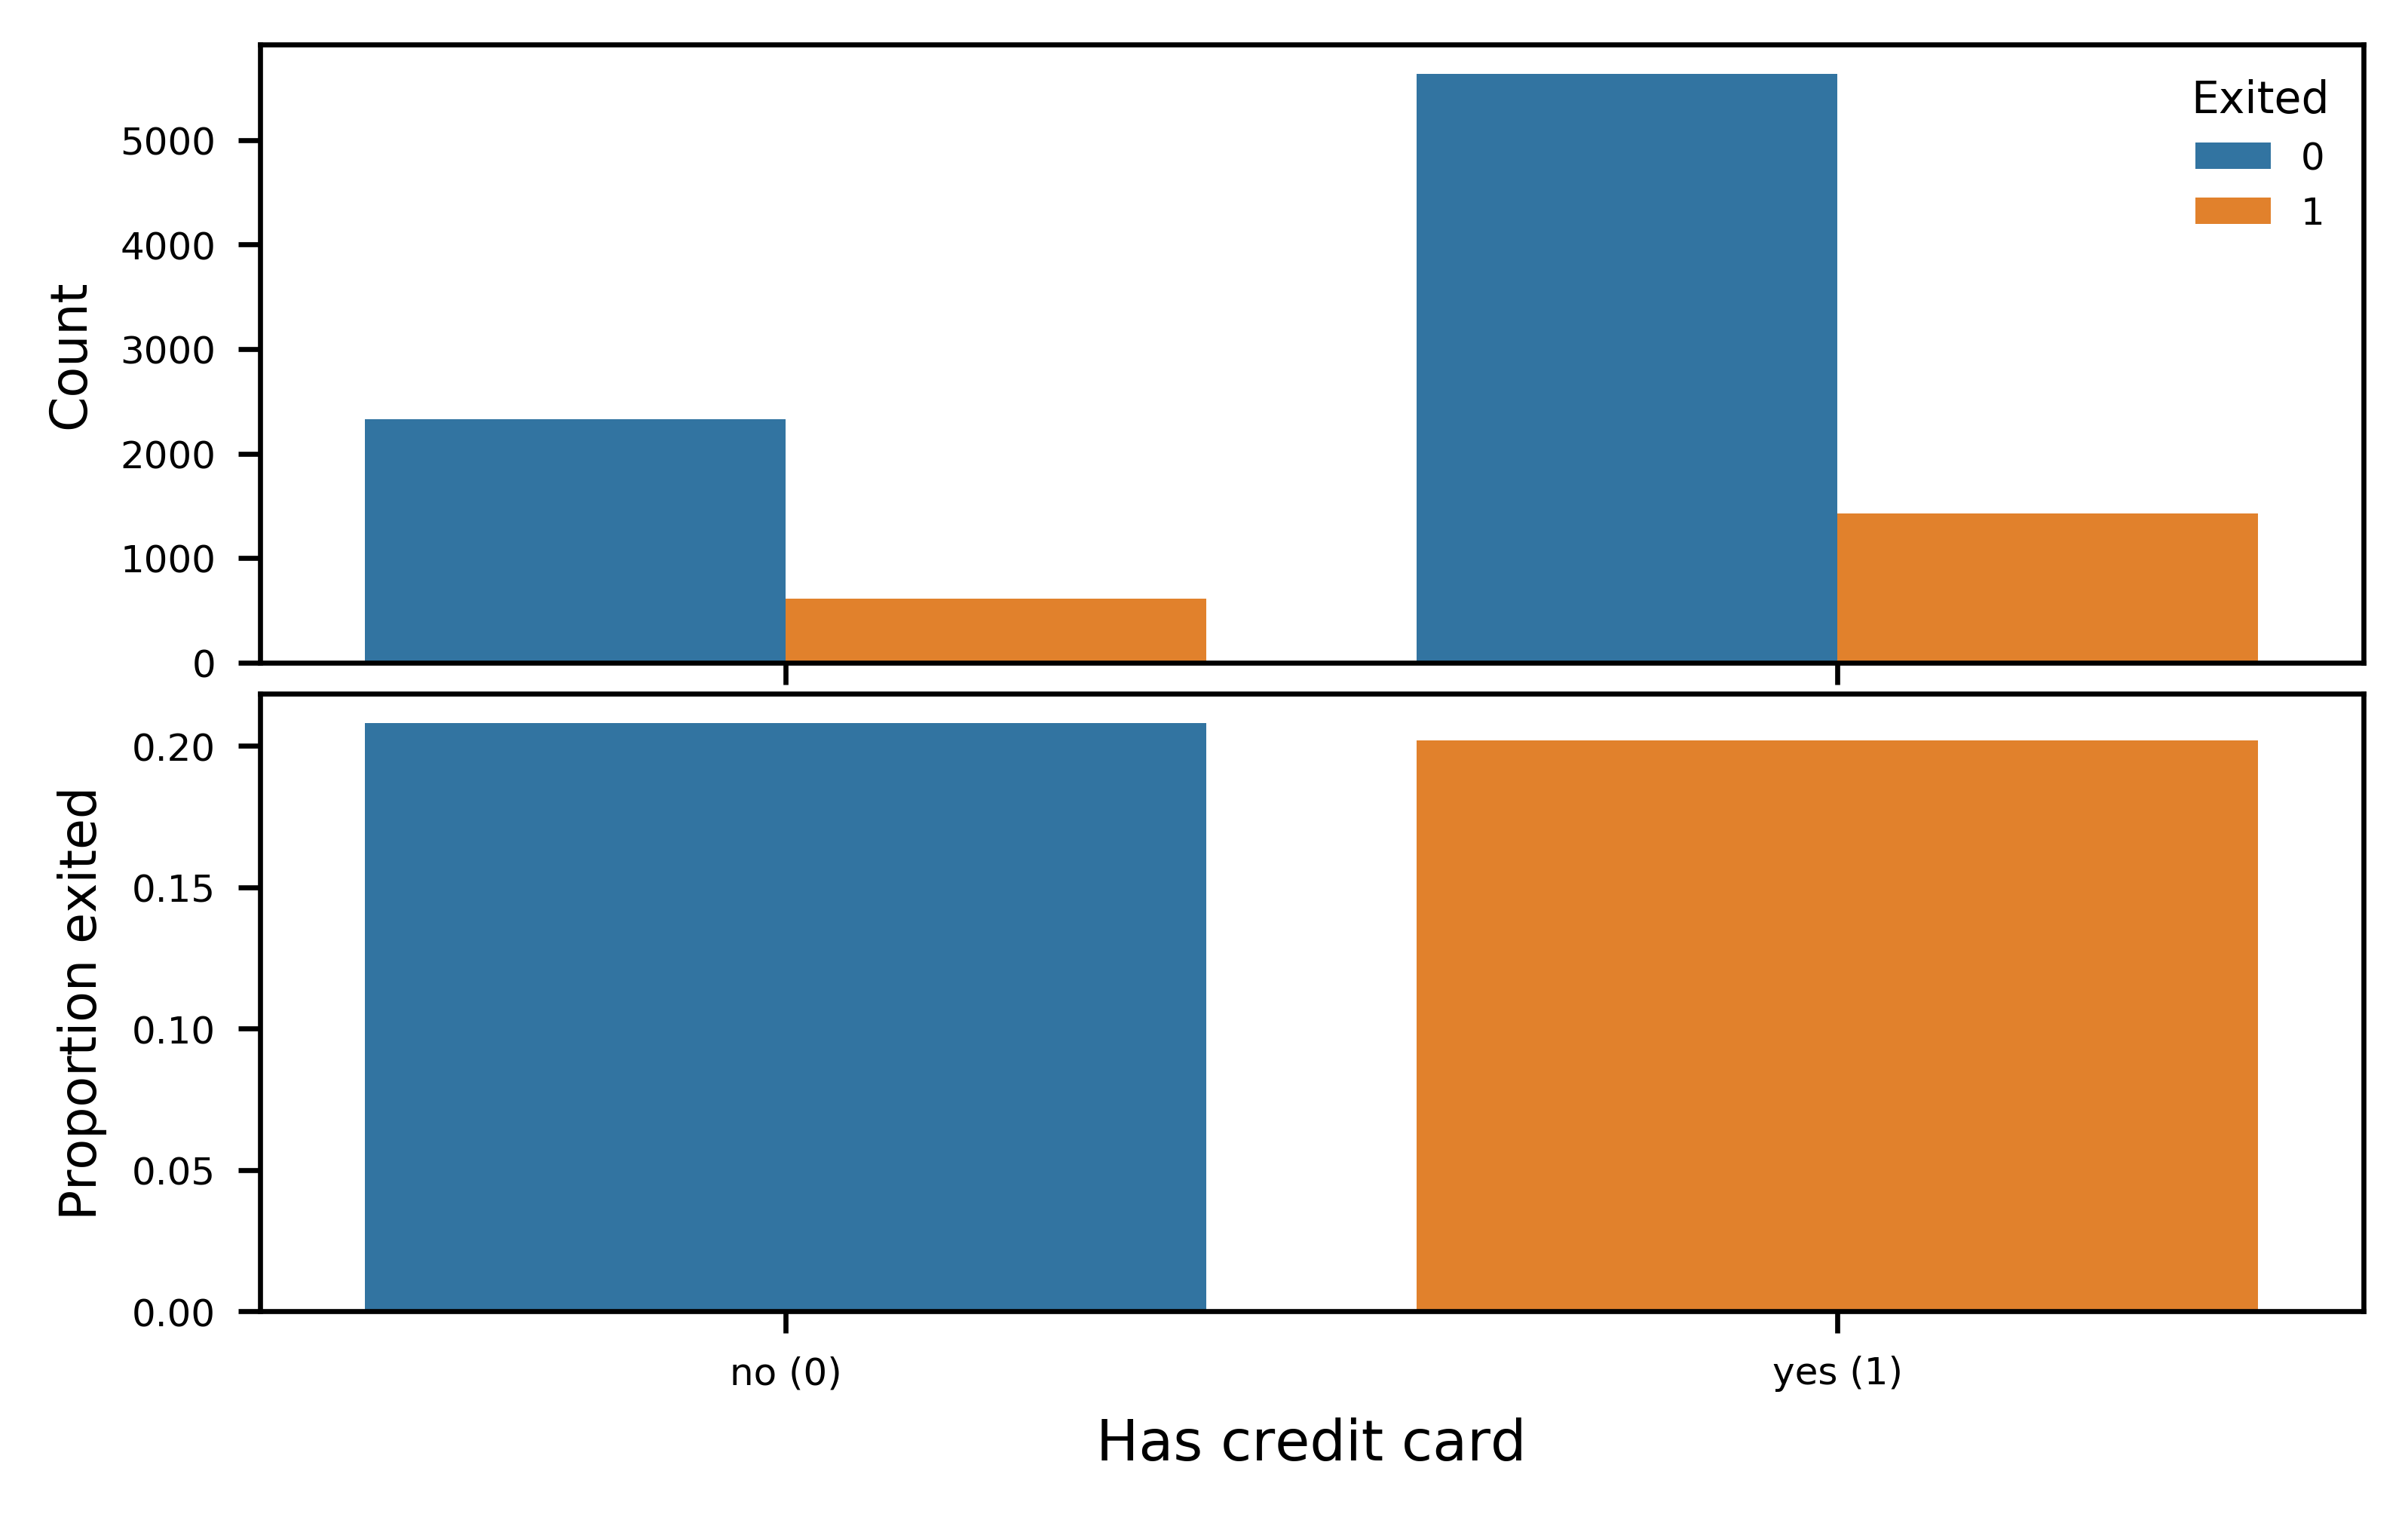

In [35]:
fig, axarr = plt.subplots(nrows=2, ncols=1, sharex=True)
fig.figsize=(20,30)
fig.dpi = 600

sns.countplot(x='HasCrCard', hue='Exited', data=data, ax=axarr[0])
axarr[0].set_xlabel(None)
axarr[0].tick_params(axis='y', labelsize=6)
axarr[0].set_ylabel('Count', size=8)
axarr[0].legend(loc='upper right', title='Exited', title_fontsize=7, fontsize=6, frameon=False)

fig.subplots_adjust(hspace=0.05, bottom=0.15, top=0.85)

sns.barplot(data.HasCrCard, data.Exited, ci=None, ax=axarr[1])
axarr[1].tick_params(axis='x', labelsize=6)
axarr[1].set_xlabel('Has credit card', size=9)
axarr[1].set_xticks(ticks=[0,1])
axarr[1].set_xticklabels(['no (0)', 'yes (1)'])
axarr[1].tick_params(axis='y', labelsize=6)
axarr[1].set_ylabel('Proportion exited', size=8)

We can see that the majority of customers have a credit card. Looking at the fractions of each category (no credit card, yes credit card) that have exited, they are very similar. It's not a variable that can be used on its own to distinguish between the two.

### Exploring activity

In [36]:
np.unique(data.IsActiveMember)

array([0, 1])

Similarly to the **HasCrCard** feature, activity feature is a binary categorical variable where 1 indicates that the customer is active and 0 that they are not (please note that we do not know the period of time considered for activity: could be active in the last week, month, year).

Text(0, 0.5, 'Proportion exited')

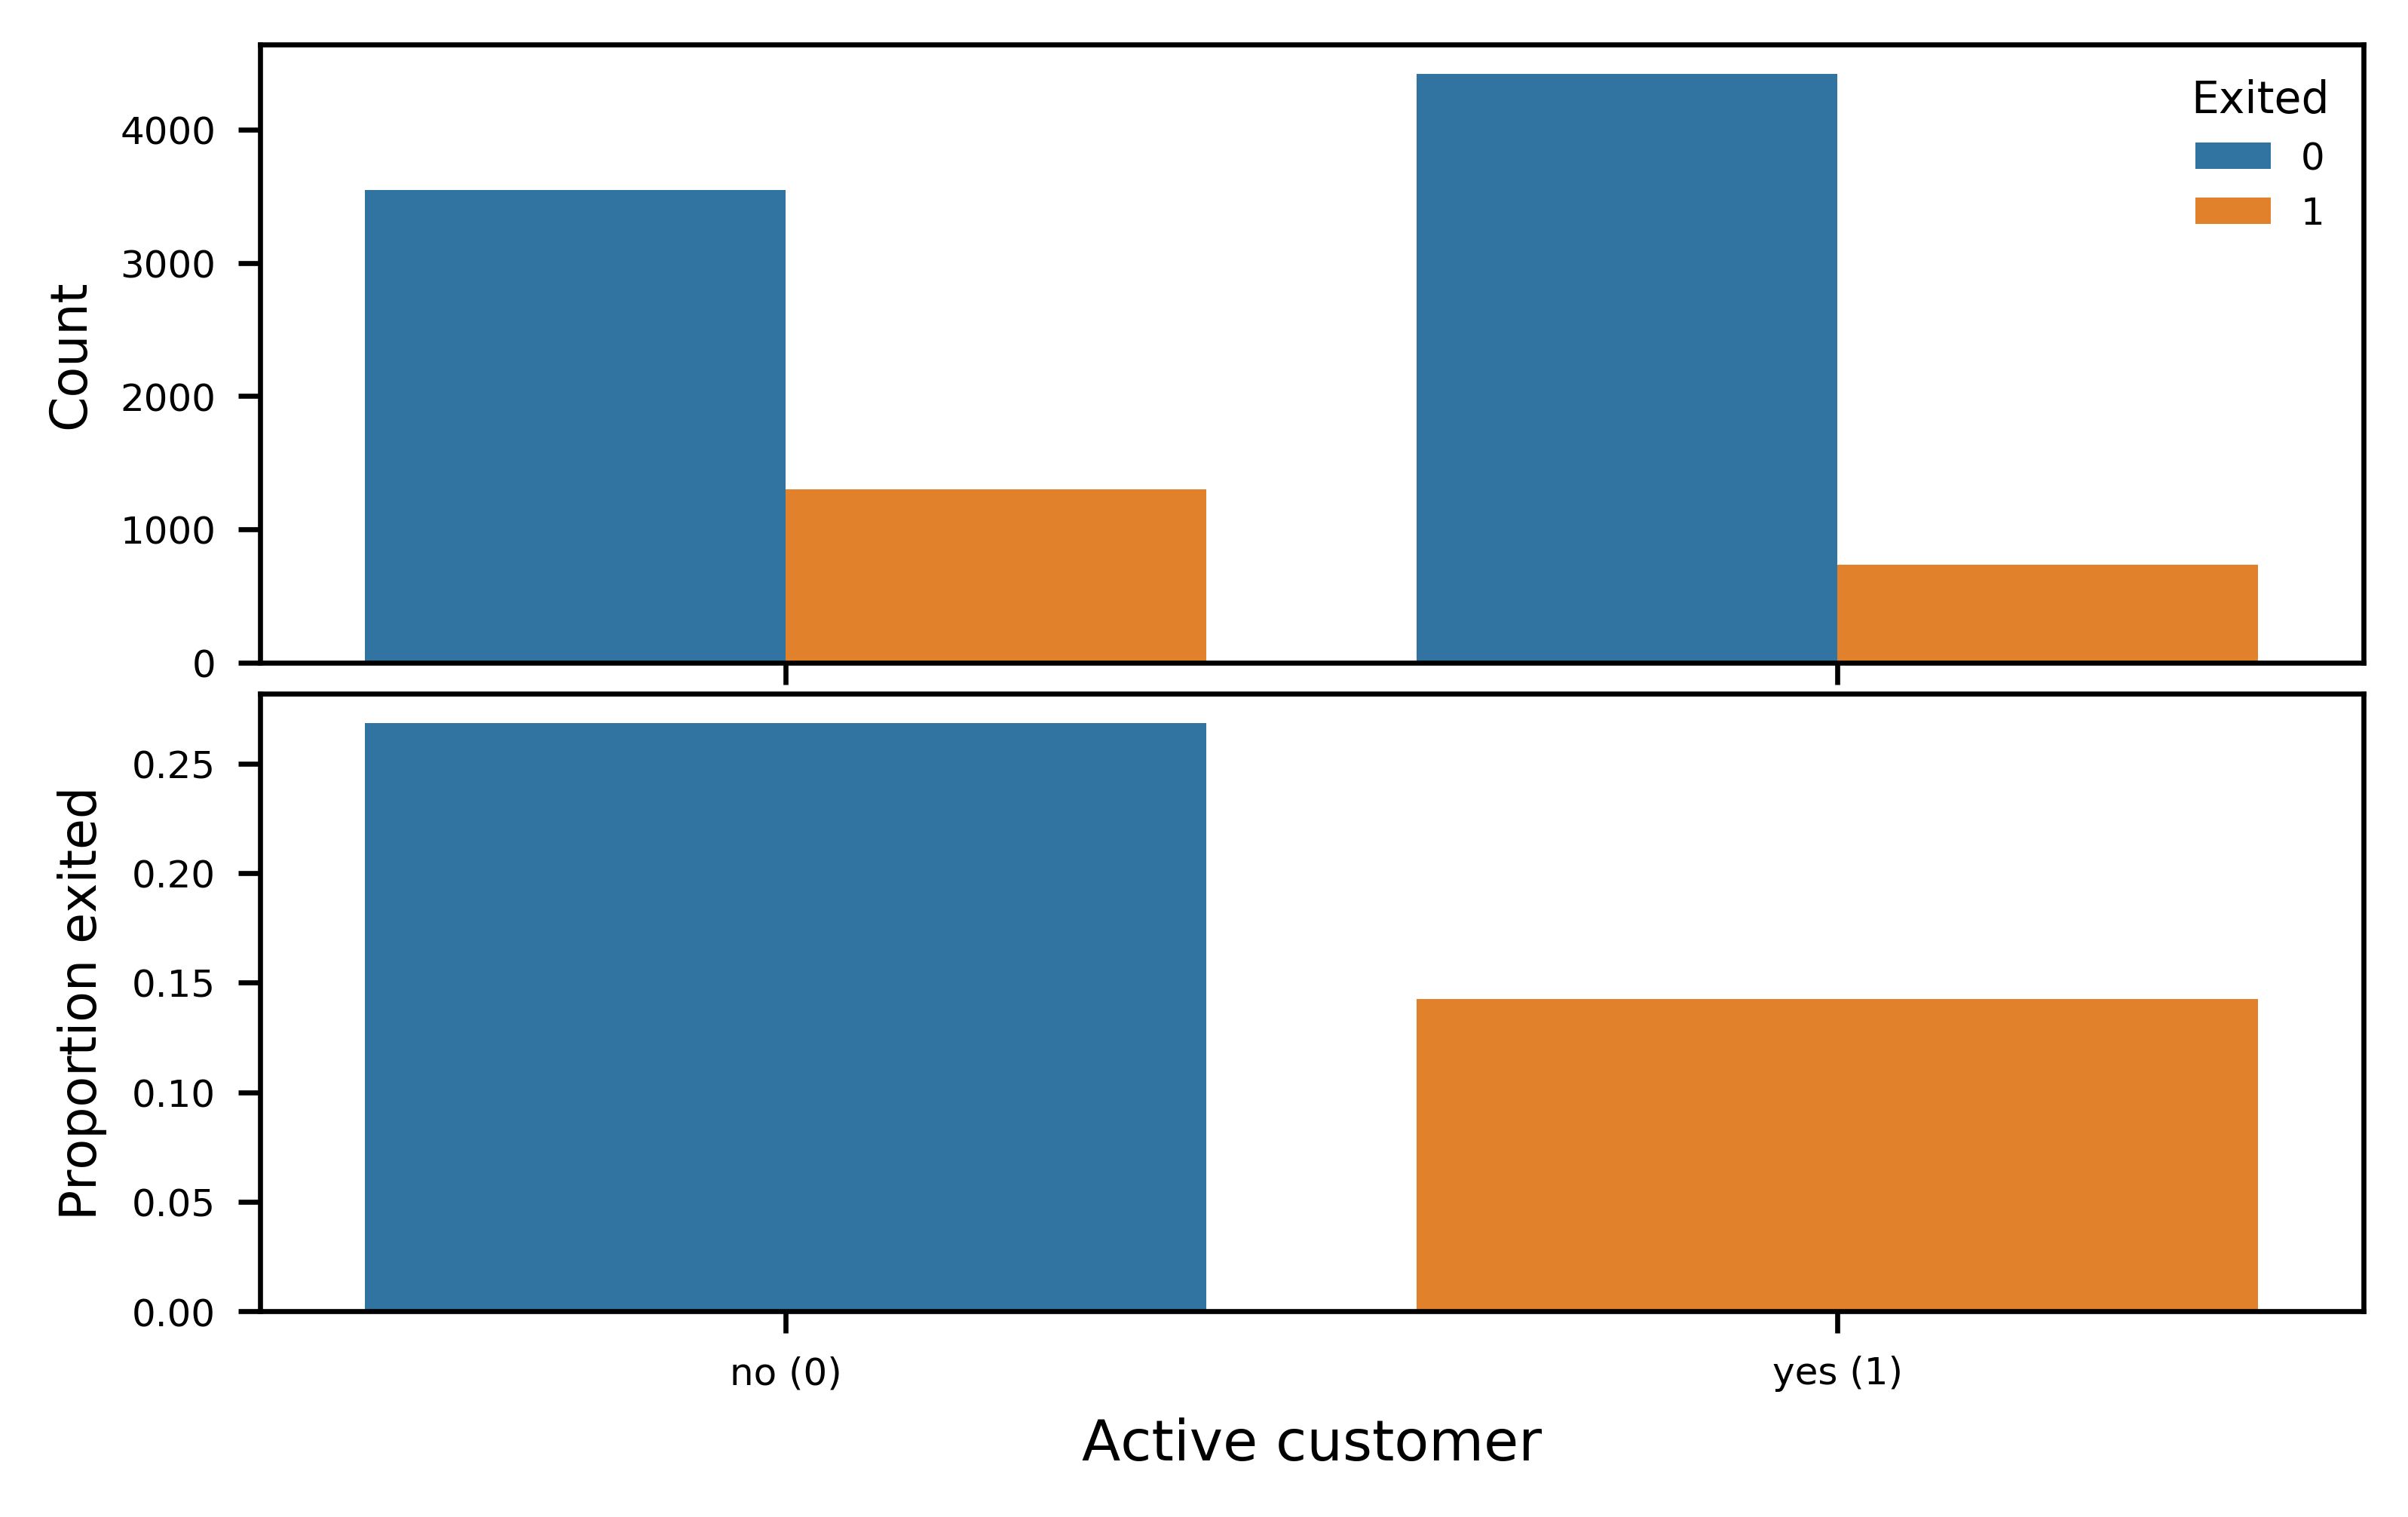

In [37]:
fig, axarr = plt.subplots(nrows=2, ncols=1, sharex=True)
fig.figsize=(20,30)
fig.dpi = 600

sns.countplot(x='IsActiveMember', hue='Exited', data=data, ax=axarr[0])
axarr[0].set_xlabel(None)
axarr[0].tick_params(axis='y', labelsize=6)
axarr[0].set_ylabel('Count', size=8)
axarr[0].legend(loc='upper right', title='Exited', title_fontsize=7, fontsize=6, frameon=False)

fig.subplots_adjust(hspace=0.05, bottom=0.15, top=0.85)

sns.barplot(data.IsActiveMember, data.Exited, ci=None, ax=axarr[1])
axarr[1].tick_params(axis='x', labelsize=6)
axarr[1].set_xlabel('Active customer', size=9)
axarr[1].set_xticks(ticks=[0,1])
axarr[1].set_xticklabels(['no (0)', 'yes (1)'])
axarr[1].tick_params(axis='y', labelsize=6)
axarr[1].set_ylabel('Proportion exited', size=8)

There are more active customers than inactive and a larger fraction of inactive customers exited (as expected).

## Exploring the target variable

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.,
        9000.]), <a list of 10 Text yticklabel objects>)

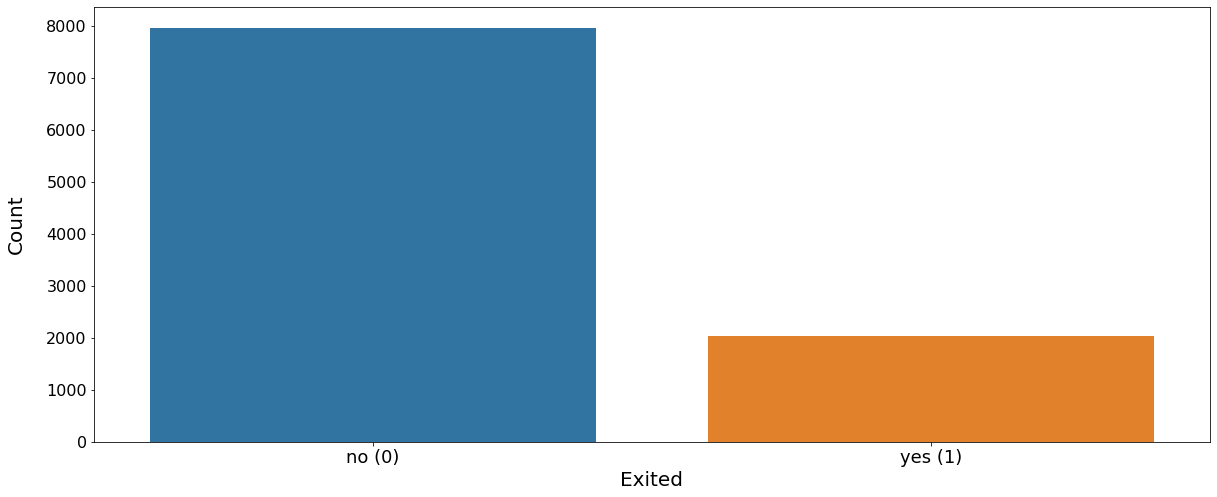

In [38]:
plt.figure(figsize=(20,8))
sns.countplot(x='Exited', data=data)
plt.xlabel('Exited', size=20)
plt.ylabel('Count', size=20, labelpad=20)
plt.xticks(ticks=[0,1], labels=['no (0)', 'yes (1)'], size=18)
plt.yticks(size=16)


**We can see there is a big class imbalance.**

In [39]:
print("Out of {0} customers, {1} have remained and {2} have exited".format(len(data),
                                                                           sum(data.Exited==0),
                                                                           sum(data.Exited==1)))
print("The dataset is quite imbalanced. {0}% of customers ".format(sum(data.Exited==1)*100.0/(len(data)*1.0))+ "have exited so we'll try to use an appropriate" +
     " metric and to handle the imbalance in classes in other ways")


Out of 10000 customers, 7963 have remained and 2037 have exited
The dataset is quite imbalanced. 20.37% of customers have exited so we'll try to use an appropriate metric and to handle the imbalance in classes in other ways


## Imbalanced Dataset Problems

The metric commonly used in classification problems is **accuracy** which simply represents the total number of correct predictions divided by the total number of predictions. For example, in this churn modelling task, if we just predict a customer will remain, the accuracy would be 79.63%. Accuracy is the default metric for many classification algorithms and/or grid search algorithms so it's important to take that into account when creating the models.





### Metrics

A confusion matrix for a binary classification problem (the current case) is just a table with two rows and two columns. Predicted yes would represent the customers that we predicted would churn (exit), predicted no would represent the customers that we predicted would not churn (exit), actual yes would represent the customers that actually churned (exited) and actual no would represent the customers that stayed (did not exited).

|           	|     	|                	|                	|
|-----------	|-----	|----------------	|----------------	|
|           	|     	| **actual**        |                	|
|           	|     	| yes            	| no             	|
| **predicted** | yes 	| true positive 	| false positive 	|
|           	| no  	| false negative 	| true negative  	|


Some important **metrics** are detailed below and we will have to choose which one(s) we will be using for selecting the models.

**Precision** represents how correct the result it when we predict it to be that. In this case precision would be: out of the customers we predicted would exit, what proportion of them actually exited?

$$\mathrm{Precision} = \dfrac{\mathrm{True~positive}}{\mathrm{True~positive + false~positive}} $$

**Recall (sensitivity)** represents how well we can detect a specific class. In this case recall would be: out of the customers that churned (exited), what proportion did we detect?

$$\mathrm{Sensitivity} = \dfrac{\mathrm{True~positive}}{\mathrm{True~positive + false~negative}} $$

**Specificity** represents how well we can detect the negative class. In this case specificity would be: out of the customers that did not exit, how many did we predict correct (i.e. truly didn't exit)?

$$\mathrm{Specificity} = \dfrac{\mathrm{True~negative}}{\mathrm{True~negative + false~positive}} $$


**Higher sensitivity means a model is better at identifying positives.
Higher specificity means a model is better at identifying negatives.**

**Use the model with higher specificity when identifying the negatives (ones that didn't exit) is more important than the ones that exited. Use the model with higher sensitivity when identifying the positives (the ones that did exit) is more important than the ones that exited.**

The **F1 score** corresponds to the harmonic mean of precision and recall.


$$ F_1 = 2 \times \dfrac{\mathrm{precision} \times \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}} $$

The general formula for F$_\beta$ score ($\beta$ chosen in such a way that recall is $\beta$ times more important than precision) is: 



$$ F_\beta = (1 + \beta^2) \times \dfrac{\mathrm{precision} \times \mathrm{recall}}{ (\beta^2 \times\mathrm{precision}) + \mathrm{recall}} = \dfrac{(1 + \beta^2) \times \mathrm{true~positive}}{(1 + \beta^2) \times \mathrm{true~positive} + \beta^2 \times \mathrm{false~negative} + \mathrm{false~positive}} $$

If we want to value recall over precision we could use F$_2$; if we wanted to value precision over recall we could use F$_{0.5}$. 



### What is the question we are trying to answer?

Let's imagine we are a bank and we are trying to determine which of our customers will exit. If we can do that, we can then target them using a push notification from the bank app, an email or just a reminder that they have money in their bank account and how we can help them save it or invest it (if such services are offered). Whatever the method is, the goal is to get them to stay and keep using their account. So it is very important to identify the **Exited** class (in this case it is a minority class as it represents approximately 20% of the entire dataset).

Consequently, **precision** and **recall** are a lot more important than **accuracy**. It would be acceptable using accuracy if the dataset was well balanced, with each class representing approximately 50% of the dataset. Sadly, a lot of the classification problems involve highly imbalanced datasets (credit card fraud/anomaly detection represents an ever more imbalancedsituation).

Why is precision important in this case? As a reminder, precision for class 1 (exited) would be: out of all the customers we predicted would exit, what proportion did actually exit? Suppose we predicted that 2000 customers would exit so we sent 2000 push notification as a reminder for the product (in this case banking app). Out of the 2000 customers, 1500 actually exited so our precision would then be 75%. What about the other 25% (500) customers? If it's a push notification, we can hope that a reminder to use the product when they are already using it is not too annoying. Maximising precision would be important in order to not send unnecessary notifications or emails to active customers. 





Why is recall (sensitivity) important in this case? As a reminder, the recall for class 1 (exited) would be: out ofall the customers that did exit, what proportion did we predict? Suppose 1500 customers exited, and we predicted 1000 of them. Our recall would then be 66.7%. We would send those customers push notifications to keep using the products. Even if we increased our recall further and reached 85%, we would still miss 15% of customers that exited. In this case, we would want to **maximise recall** as we don't want to lose customers.

**BUT** similar to the accuracy point that was mentioned earlier, if we just predict that everyone will exit then we would have a high recall, but not a lot of precision. Ideally we want to **maximise recall and precision** by plotting **recall-precision curves**. .

Other metrics also exist: balance accuracy score (in sklearn it's defined as the average of recall of each class), ROC AUC (receiver operating haracteristic area under curve), Cohen's Kappa etc. Why not use the ROC AUC score? The ROC AUC score is better suited when the two classes are relatively balanced. When we care about the true positive and false positives (i.e. customers that we predicted churned and who churned, and customers that we predicted would churn but didn't churn), then precision-recall curves are quite useful. In the grid search function of scikit-learn, the scorer that best represents that is the [**average_precision_score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score).

## Dealing with imbalanced datasets

### Keeping the dataset as it is

We can keep the dataset as it is (with the imbalanced classes) and see how our models perform on the test set after being training on the unmodified training set. Alternatively, many classifiers (LogReg, SVC, Random Forests etc.) have a **class_weight** parameter. We can use **weights to counteract the class imbalance** by giving the minority class (in this case **Exited**) a heavier weighting. Obviously increasing weights of the minority class will increase the recall but decrease the precision at the same time. Still, it's an option worth considering while using precision-recall curves to find the best combination.

### Undersampling from the majority class

Undersampling can be used in order to balance the data by randomly choosing a subset of data from the majority class. The under sampling can be done with and without replacement and both will be explored.

### Over-sampling from the minority class

One way to deal with the imbalanced dataset is to over-sample from the minority class by randomly sampling with replacement. There are also methods to generate synthetic data from the minority class (e.g. using a etchnique such as [SMOTE](https://arxiv.org/pdf/1106.1813.pdf) or [ADASYN](https://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf)). The problem with the two artifical data generators is that they can't deal with categorical variables (like **Geography**, **IsActive**, etc.). An extension of the SMOTE algorithm, SMOTE-NC, can deal with categorical variables as well. The usage of random sampling with replacement and SMOTE-NC will be explored in this study.

### Things to consider with resampling

The problem with resampling (using any method) is choosing the representation in the dataset: do we aim for equal (50/50) representation of the two classes? Should we still have a majority class? How do we choose the proportion?

Consequently, depending how we answer these questions resampling data will show the wrong proportion of the classes during training. Real data, however, will most likely have the same imbalance of the classes as the original data and a binary classifier trained on a resampled dataset might not perform as well on the test set. Still, it's an option that will be explored.

**Changing the dataset through resampling has consequences** so we have to be careful.

### Use models that are better at dealing with imbalanced classes

Tree ensemble methods like random forests or gradient boosted trees tend to be better at performing on imbalanced datasets due to their hierarchical struture. Still, we have to make sure that we explore the effect of greater weights and/or sampling methods (while using an appropriate metrics) on these type of models as well.

# Data Preprocessing

We explored the data initially, now it's time to have a look at some of the preprocessing that we need to do in order to prepare the data for the ML algorithms. Normally, I'd start with a missing values section but since the dataset is complete, that's not necessary in this case.

## Dealing with outliers

Earlier we saw that there are some outliers in the data. Let's deal with those.

In [40]:
high_quant = data.quantile(0.999)
data_copy = data.copy()
for i in num_attributes.columns:
    data_copy = data_copy.drop(data[i][data[i]>high_quant[i]].index)

In [41]:
high_quant

CreditScore           850.00000
Age                    81.00000
Tenure                 10.00000
Balance            212314.40894
NumOfProducts           4.00000
EstimatedSalary    199775.69996
Exited                  1.00000
Name: 0.999, dtype: float64

In [42]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9972 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      9972 non-null   int64   
 1   Geography        9972 non-null   category
 2   Gender           9972 non-null   category
 3   Age              9972 non-null   int64   
 4   Tenure           9972 non-null   int64   
 5   Balance          9972 non-null   float64 
 6   NumOfProducts    9972 non-null   int64   
 7   HasCrCard        9972 non-null   category
 8   IsActiveMember   9972 non-null   category
 9   EstimatedSalary  9972 non-null   float64 
 10  Exited           9972 non-null   int64   
dtypes: category(4), float64(2), int64(5)
memory usage: 662.6 KB


The outlier removal operation removed 28 data points.

## Handling text and categorical attributes

In [43]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


For the categorical attributes we need to deal with the Geography feature, Gender Feature (the **HasCrCard** and **IsActiveMember** features are already binary). Since there are only 2 categorical features left and it's a relatively small dataset, I will one hot encode them. The reason we want to one hot encode them rather than just use integers is that we don't want to have any kind of "ordering"/ordinality between them.

In [44]:
from sklearn.preprocessing import OneHotEncoder
categorical_encoder = OneHotEncoder()
processed_1hot_data = categorical_encoder.fit_transform(data_copy.loc[:,['Geography','Gender']])
processed_1hot_data.get_shape()
processed_1hot_data

<9972x5 sparse matrix of type '<class 'numpy.float64'>'
	with 19944 stored elements in Compressed Sparse Row format>

In [45]:
processed_1hot_data.toarray()

array([[1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

Note that there are 9972 samples and 5 features: 3 columns for Geography (since there are 3 countries) and 2 for Gender (since there are 2 genders). Since there are a lot of zeros, it's stored as a sparse matrix (can be converted back to an array using its ***.toarray()*** method).

## Feature scaling

Ok so we still have the **CreditScore**, **Age**, **Tenure**, **Balance**, **NumOfProducts** and **EstimatedSalary** features that we haven't touched. For **CreditScore**, **Age**, **Balance** and **EstimatedSalary** we noticed that they have a relatively gaussian distribution so we will use a StandardScaler for them to standardise them. For the **Tenure**, **NumOfProducts** we won't use a StandardScaler but use a MinMaxScaler instead.

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [47]:
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

In [48]:
scaler_standard.fit(data_copy.loc[:,['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])
scaler_minmax.fit(data_copy.loc[:,['Tenure', 'NumOfProducts']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [49]:
standard_data = scaler_standard.transform(data_copy.loc[:,['CreditScore', 'Age', 'Balance', 'EstimatedSalary' ]])
minmax_data = scaler_minmax.transform(data_copy.loc[:,['Tenure', 'NumOfProducts']])

In [50]:
data_copy['CreditScore'] = standard_data[:,0]
data_copy['Age'] = standard_data[:,1]
data_copy['Balance'] = standard_data[:,2]
data_copy['EstimatedSalary'] = standard_data[:,3]
data_copy['Tenure'] = minmax_data[:,0]
data_copy['NumOfProducts'] = minmax_data[:,1]

In [51]:
data_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326823,France,Female,0.299430,0.2,-1.225988,0.000000,1,1,0.024328,1
1,-0.440649,Spain,Female,0.203361,0.1,0.120204,0.000000,0,1,0.219158,0
2,-1.537519,France,Female,0.299430,0.8,1.338617,0.666667,1,0,0.243334,1
3,0.501003,France,Female,0.011223,0.1,-1.225988,0.333333,0,0,-0.106600,0
4,2.063525,Spain,Female,0.395498,0.2,0.790071,0.000000,1,1,-0.363199,0


We can implement the transformations above manually but if a bigger dataset comes through, or we deploy the model and new samples are coming in continuously, it would be better to have a **transformation pipeline**.

In [52]:
data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited                int64
dtype: object

In [53]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Creating a transformation pipeline

Instead of applying all the transformations by hand, let's use sklearn's Pipeline class to help us (will always create one as ideally the ML models will be deployed afterwards, so we want to have the Pipelines ready).

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.base import TransformerMixin, BaseEstimator

In [56]:


# remove the outliers
high_quant = data.quantile(0.999)
data_copy = data.copy()
for i in num_attributes.columns:
    data_copy = data_copy.drop(data[i][data[i]>high_quant[i]].index)



# split the data into the features and the target variable
data_X = data_copy.drop('Exited', axis=1)
data_y = data_copy['Exited'].copy()

# change the HasCrCard, IsActiveMember, Geography (country) and Gender feature data type to categorical
data_copy['HasCrCard'] = data_copy['HasCrCard'].astype('category')
data_copy['IsActiveMember'] = data_copy['IsActiveMember'].astype('category')
data_copy['Geography'] = data_copy['Geography'].astype('category')
data_copy['Gender'] = data_copy['Gender'].astype('category')

# update the list of numerical (not categorical) attributes
num_attributes = data_copy.select_dtypes(exclude=['object', 'category']).drop('Exited', axis=1).copy()

# create a list containing categorical attributes
cat_attributes = data_copy.select_dtypes(include=['category']).copy()




In [57]:
num_attributes_to_stand = data_X.loc[:,['CreditScore', 'Age',
                                        'Balance', 'EstimatedSalary']]

num_attributes_to_minmax = data_X.loc[:,['Tenure', 'NumOfProducts']]

cat_attributes_to_transform = data_X.loc[:,['Geography', 'Gender']]

cat_attributes_to_not_transform = data_X.loc[:,['HasCrCard', 'IsActiveMember']]



num_attribs_to_stand = list(num_attributes_to_stand)
num_attribs_to_minmax = list(num_attributes_to_minmax)
cat_attribs_to_transform =  list(cat_attributes_to_transform)

# create the numerical pipelines 
num_pipeline_std = Pipeline([
    ('std_scaler', StandardScaler())
])

num_pipeline_minmax = Pipeline([
    ('min_max_scaler', MinMaxScaler())
])

In [58]:
the_pipeline = ColumnTransformer([
    ("num_std", num_pipeline_std, num_attribs_to_stand),
    ("num_minmax", num_pipeline_minmax, num_attribs_to_minmax),
    ("cat", OneHotEncoder(), cat_attribs_to_transform )
],remainder='passthrough')

In [59]:
print(data_X.describe())

       CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  9972.000000  9972.000000  9972.000000    9972.000000    9972.000000   
mean    650.583734    38.883173     5.012736   76324.509165       1.530686   
std      96.643473    10.409733     2.892612   62258.648693       0.581672   
min     350.000000    18.000000     0.000000       0.000000       1.000000   
25%     584.000000    32.000000     3.000000       0.000000       1.000000   
50%     652.000000    37.000000     5.000000   97079.410000       1.000000   
75%     718.000000    44.000000     7.000000  127574.692500       2.000000   
max     850.000000    81.000000    10.000000  212314.030000       4.000000   

       EstimatedSalary  
count      9972.000000  
mean      99951.171504  
std       57456.377630  
min          11.580000  
25%       50895.310000  
50%      100088.080000  
75%      149174.227500  
max      199775.670000  


In [60]:
data_X_prepared = the_pipeline.fit_transform(data_X)

In [61]:
data_X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [62]:
data_X_prepared[0]

array([-0.326823088508783, 0.29942971720424727, -1.2259876819728732,
       0.024327648911540444, 0.2, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1, 1],
      dtype=object)

In [63]:
data_X_prepared[:,4]

array([0.2, 0.1, 0.8, ..., 0.7000000000000001, 0.30000000000000004, 0.4],
      dtype=object)

In [64]:
data_X_prepared.shape

(9972, 13)

In [65]:
data_y.shape

(9972,)

# Create training/test sets and save the data

So that I can use the data easily in other scripts/notebooks I will create the training and test set splits and save them to files.

In [66]:
# split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_X_prepared,
                                                   data_y.values,
                                                   test_size=0.2,
                                                   random_state=6)

In [67]:
X_train.shape

(7977, 13)

In [68]:
X_test.shape

(1995, 13)

In [69]:
y_train.shape

(7977,)

In [70]:
y_test.shape

(1995,)

In [71]:
np.savetxt('X_train', X_train)
np.savetxt('X_test', X_test)
np.savetxt('y_train', y_train)
np.savetxt('y_test', y_test)

In [1]:
import numpy as np
X_train = np.loadtxt('X_train')
X_test = np.loadtxt('X_test')
y_train = np.loadtxt('y_train')
y_test = np.loadtxt('y_test')

# Create and assess ML models

As we mentioned before, the model selection will be split into three parts:
1. Keeping the imbalanced dataset as it is and exploring the usage of weights for the two classes  
3. Oversampling the minority class (with replacement and by generating new data points using SMOTE-NC) 
3. Undersampling the majority class  
4. Oversampling the minority class before undersampling the overall dataset by removing Tomek links.
 


In the current notebook one can see the models that were used but the actual training took place on an HPC service on many cores just to make it faster than running it on my laptop. The metric that will be used in all the grid searches for all the models is the f1 score in order to have a balance between precision and recall.

The way the model selection is as follows:
- for the various ways of dealing with the imbalanced dataset, train each type of classifier
- set each of the best classifiers from each type of dealing with the dataset against each other
- battle the various types of classifiers among themselves using a precision-recall curve or roc curve

## Keeping the imbalanced dataset

The dataset was kept imbalanced and in grid search the following two ways were performed:
```python
'class_weight':[None]
```


The dataset was kept imbalancedand in the grid search the following was performed:
```python
'class_weight':[{0:1, 1:1}, {0:1, 1:5}, {0:1, 1:10}, {0:1, 1:20}, {0:1, 1:50}]
```


For example, to perform a grid search for logistic regression for the first way:

```python
log_reg_param_grid = {'C':[0.01, 0.1, 1, 10, 100],
                     'max_iter':[100, 200, 300, 500],
                     'penalty':['l2'],
                     'class_weight':['balanced', None],
                     'tol': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
                     }
```

To perform a grid search for logistic regression for the second way:
```python
log_reg_param_grid = {'C':[0.01, 0.1, 1, 10, 100],
                     'max_iter':[100, 200, 300, 500],
                     'penalty':['l2'],
                     'class_weight':[{0:1, 1:1}, {0:1, 1:5}, {0:1, 1:10}, {0:1, 1:20}, {0:1, 1:50}],
                     'tol': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
                     }
```

## Oversampling the minority dataset

The first way is to simply oversample the minority dataset (please note that for this it makes no sense to say with or without replacement, as if it was without replacement we wouldn't be able to oversample).

In [117]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0.0, 6360), (1.0, 6360)]


The other method used to deal with the minority dataset is oversampling using [Synthetic Minority Over-sampling Technique for Nominal and Continuous (SMOTE-NC)](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC).

In order to use SMOTENC, the categorical features columns must be specified using the **categorical_features** keyword argument.



Let's have a quick look at one of the samples in our training dataset.

In [118]:
X_train[0]

array([-0.17160565, -0.18091408, -0.39742671,  1.46834768,  0.7       ,
        0.33333333,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  1.        ])

The column order is as follows (using 0 as the index for the first column):
0. Credit Score (standardised)
1. Age (standardised)
2. Balance (standardised)
3. Estimated Salary (standardised)
4. Tenure (minMaxed)
5. Num Of Products (minMaxed)
6. geoFrance (OneHotEncoded)
7. geoGermany (OneHotEncoded)
8. geoSpain (OneHotEncoded)
10. genderFemale (OneHotEncoded)
11. genderMale (OneHotEncoded)
11. Has credit card (pass through without transformation)
12. is Active (pass through without transformation)

When we pass the samples to the **SMOTENC** resampler we want to make sure that the categorical features are provided using the correct indices for the columns.

In [160]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[4,5,6,7,8,9,10,11,12], random_state=0)
X_res, y_res = smote_nc.fit_resample(X_train, y_train)
print(sorted(Counter(y_res).items()))
print(X_res[-5:])


[(0.0, 6360), (1.0, 6360)]
[[-0.42244657 -0.69006621  1.35511016  0.60450941  1.          0.66666667
   1.          0.          0.          1.          0.          1.
   0.        ]
 [-0.33442408  0.70997523  1.08966055 -1.12057677  0.4         0.
   0.          1.          0.          0.          1.          0.
   1.        ]
 [-2.57083459  0.86644008  0.81983396  1.32379069  0.3         0.
   0.          1.          0.          0.          1.          1.
   0.        ]
 [ 0.41822061  1.29363911 -1.22598768  1.34025799  0.3         0.
   1.          0.          0.          0.          1.          1.
   1.        ]
 [ 0.58459388  0.36228573  0.74015405  1.436087    0.5         0.
   0.          1.          0.          1.          0.          1.
   0.        ]]


Since I haven't used SMOTENC in the past, I was slightly unsure about how it works. For example, given that I passed the OneHotEncoder() columns for Geography as Categorical features, how does it deal with those? Since only one 1 can be present in either of the three categories, let's look at the total sum of the three columns. It should be equal to the number of samples that we have in the resampled dataset. The same idea will apply for the two gender columns.

In [161]:
np.unique(X_res[:,6]+X_res[:,7]+X_res[:,8])

array([0., 1.])

In [162]:
sum((X_res[:,6]+X_res[:,7]+X_res[:,8])==0)

89

Let's do the same for the gender columns.

In [163]:
sum(np.logical_xor(X_res[:,9], X_res[:,10]))==X_res.shape[0]

True

In [164]:
sum((X_res[:,9]+X_res[:,10])==0)

0

That means that there are some samples (89 of them) in the resampled dataset where we have 0 in all of the three geography columns but fortunately that does not happen with the gender columns (still, it could occur so we have to account for that). Since that's not correct for our dataset, let's drop them (the ones with three zeroes in the three geography columns).

In [165]:
sum((X_res[:,6]+X_res[:,7]+X_res[:,8])==0)

89

In [166]:
# create a boolean mask
geo_bool_mask = (X_res[:,6]+X_res[:,7]+X_res[:,8])==1

In [167]:
X_res[geo_bool_mask].shape

(12631, 13)

In [169]:
y_res[geo_bool_mask].shape

(12631,)

In [170]:
X_res = X_res[geo_bool_mask]
y_res = y_res[geo_bool_mask]

In [171]:
# in this case not necessary, but if we had some incorrect gender samples as well (both 0 or both 1, i.e. sum not 1)
gender_bool_mask = (X_res[:,9]+X_res[:,10])==1

In [173]:
X_res = X_res[gender_bool_mask]
y_res = y_res[gender_bool_mask]

**Please note that the two masks must be applied sequentially if using the way written above or you risk getting an  array broadcasting error.**

If we start with the loaded train/test split, the following will create the SMOTENC resampled dataset:

```python
X_train = np.loadtxt('X_train')
X_test = np.loadtxt('X_test')
y_train = np.loadtxt('y_train')
y_test = np.loadtxt('y_test')

from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[4,5,6,7,8,9,10,11,12], random_state=0)
X_res, y_res = smote_nc.fit_resample(X_train, y_train)

geo_bool_mask = (X_res[:,6]+X_res[:,7]+X_res[:,8])==1
X_res = X_res[geo_bool_mask]
y_res = y_res[geo_bool_mask]

gender_bool_mask = (X_res[:,9]+X_res[:,10])==1
X_resampled = X_res[gender_bool_mask]
y_resampled = y_res[gender_bool_mask]
```

## Under sampling

The under sampling technique explored in this project is the ***RandomUnderSampler*** class from **imblearn**. One of its parameters is the **replacement** keyword argument which can be **True** or **False**. If **True**, the majority class is under sampled by randomly picking classes with replacement (meaning the same sample can be picked multiple times). If **False**, the samples will not repeat themselves (unless they themselves were repeated in the dataset. Nonetheless, that shouldn't happen as generally the data is cleaned for duplicates with some exceptions).

In [4]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0, replacement=True)
X_resampled, y_resampled = rus.fit_sample(X_train, y_train)

In [5]:
print(sorted(Counter(y_resampled).items()))

[(0.0, 1617), (1.0, 1617)]


In [6]:
rus = RandomUnderSampler(random_state=0, replacement=False)
X_resampled, y_resampled = rus.fit_sample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0.0, 1617), (1.0, 1617)]


Note that we reduced the majority class by a lot, we will test at the end to see if it was worth it.

Another under sampling technique that was explored in this project is the removal of Tomek's links (close instances of opposite classes). By doing so, we remove the two classes that are closest to each other in order to increase the spacing/separation between the classes thus facilitating the classification process.

In [8]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_resampled, y_resampled = tl.fit_sample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0.0, 5923), (1.0, 1617)]


Note that we only removed the data points from the majority class due to the class imbalance.

## Combination of over-sampling and under-sampling techniques.

In [9]:
from collections import Counter
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import TomekLinks
smote_nc = SMOTENC(categorical_features=[4,5,6,7,8,9,10,11,12], random_state=0)
X_res, y_res = smote_nc.fit_resample(X_train, y_train)

geo_bool_mask = (X_res[:,6]+X_res[:,7]+X_res[:,8])==1
X_res = X_res[geo_bool_mask]
y_res = y_res[geo_bool_mask]

gender_bool_mask = (X_res[:,9]+X_res[:,10])==1
X_resampled1 = X_res[gender_bool_mask]
y_resampled1 = y_res[gender_bool_mask]
print(sorted(Counter(y_resampled1).items()))


tl = TomekLinks()
X_resampled, y_resampled = tl.fit_sample(X_resampled1, y_resampled1)
print(sorted(Counter(y_resampled).items()))








[(0.0, 6360), (1.0, 6271)]
[(0.0, 6085), (1.0, 6271)]



## Assessing ML Models

As mentioned, I ran all the models in separate python scripts in order to run them in the cloud. In each one, I had the various models I considered and I wrote the results to a dataframe that I then exported to csv. Then I brought all the CSV files together in the Battle Royale notebook.

The code below shows the function I used to create dataframes for the results.
```python
import numpy as np
import pandas as pd

#import needed functions
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# import the scoring/metrics functions we will use
# since it's classification
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score

from time import time

# create a nice dataframe to store results
results_df = pd.DataFrame(columns=['model', 'average_precision_score', 'balanced_accuracy_score',
                                   'accuracy_score', 'recall_score', 'f1_score',
                                   'cohen_kappa_score', 'precision_score', 'roc_auc_score'])

def choose_best(model, train_x , train_y , test_x , test_y):
    results = dict()
    results['model'] = model
    
    # for calculate time of fitting data
    start = time()
    model.fit(train_x,train_y)
    end = time()
    results['train_time'] = end-start
    
    # get the predicted results
    pred_y = model.predict(test_x)
    
    # calculate the various metrics
    results['average_precision_score'] = average_precision_score(test_y, pred_y)
    results['balanced_accuracy_score'] = balanced_accuracy_score(test_y, pred_y)
    results['accuracy_score'] = accuracy_score(test_y, pred_y)
    results['recall_score'] = recall_score(test_y, pred_y)
    results['f1_score'] = f1_score(test_y, pred_y)
    results['cohen_kappa_score'] = cohen_kappa_score(test_y, pred_y)
    results['precision_score'] = precision_score(test_y, pred_y)
    results['roc_auc_score'] = roc_auc_score(test_y, pred_y)
    return results
```

Example of how the models are added to the results dataframe:

```python
log_reg_param_grid = {'C':[0.1, 1],
                     'max_iter':[100, 200],
                     'penalty':['l2'],
                     'class_weight':['balanced',None],
                     'tol': [1e-6, 1e-5]
                     }
log_reg = LogisticRegression()
log_reg_grid_search = GridSearchCV(log_reg, log_reg_param_grid,
                                  cv=5, refit=True, n_jobs=-1, scoring='average_precision')
log_reg_grid_search.fit(X_train,y_train)

# Run the model on the testing dataset to compute the various metrics
model = log_reg_grid_search.best_estimator_
results = choose_best(model, X_train, y_train, X_test, y_test)

# add the result to the big results dataframe

results_df = results_df.append(results, ignore_index=True)

# write the dataframe to a file
results_df.to_csv('normal_sampling_without_weights.csv')
```

All the python scripts and results files can be found in the **trained** folder.